<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/%EB%B6%84%EB%A5%98%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%81_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B9%80%EC%A3%BC%EC%9B%90_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Colab 한글 폰트 설정하기
Colab에서 한글 폰트를 사용하려면 폰트를 설치하고 런타임을 재시작한 후, Matplotlib 설정을 변경해야 합니다.

**1) 폰트 설치 (코드 셀에서 실행)**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,189 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and dire

**2) 런타임 재시작**
* Colab 메뉴에서 **[런타임] > [세션 다시 시작]**을 클릭합니다. (Ctrl+M .)

**3) Matplotlib 폰트 설정 (세션 재시작 후)**


한글 폰트 'NanumGothic' 설정 완료.


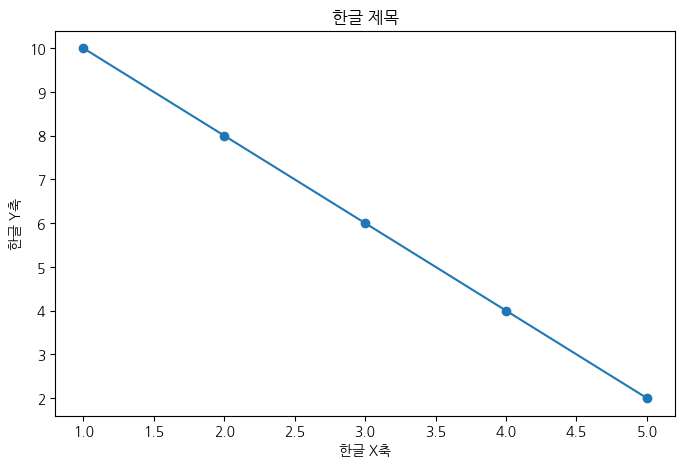

In [1]:
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # 런타임 재시작 후 Nanum 폰트 확인 및 설정
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # 전역 폰트 설정
    plt.rc('font', family='NanumGothic')
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

    print("한글 폰트 'NanumGothic' 설정 완료.")

    # 이제 그래프에 한글 사용 가능 (test 용)
    fig, ax = plt.subplots(figsize=(8, 5))
    x = [1, 2, 3, 4, 5]
    y = [10, 8, 6, 4, 2]
    ax.plot(x, y, marker='o')
    ax.set_title('한글 제목')
    ax.set_xlabel('한글 X축')
    ax.set_ylabel('한글 Y축')
    plt.show()

# 1. **기존 데이터셋** Phase 1-프로젝트 준비 및 탐색
# 신규노선 항공운임예측

# **1. 프로젝트 정의 및 목표 설정**

본 프로젝트의 목표는 항공 운임(Airfare)을 예측하는 회귀 모델을 개발하는 것이다. 사용자는 항공편의 출발지, 도착지, 경유 여부, 항공사 등의 정보를 기반으로 해당 항공권의 가격을 예측하고자 한다. 이는 가격 책정 전략 수립, 경쟁사 분석, 고객 맞춤형 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)

본 프로젝트에서는 제공된 Airfares_simple_garbled.csv 데이터를 사용한다. 해당 데이터는 항공 운임에 영향을 줄 수 있는 다양한 변수(출발지, 도착지, 항공사, 여행일, 경유 여부 등)와 실제 운임 정보를 포함하고 있으며, 데이터 출처는 항공권 가격 조사에서 수집된 것으로 추정된다. 다만, 원본 데이터에는 일부 오류 혹은 비정상적인 값이 포함되어 있어 추가적인 정제 작업이 필요하다.



● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 Root Mean Squared Error (RMSE) 와 Mean Absolute Error (MAE) 를 기준으로 한다. 다음과 같은 성능 기준을 목표로 설정한다:

RMSE: 40 이하

MAE: 30 이하

이는 항공권 가격 예측의 오차가 실제 비즈니스에 유의미하게 작용할 수 있는 수준을 고려한 수치이다.




● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:

-고객에게 보다 정확한 예상 항공권 가격을 제공하여 구매 결정 지원

-항공사 또는 여행 플랫폼에서 가격 예측 기반 맞춤 추천 가능

# **2. 데이터 수집 및 로드**

In [2]:
# 1. 원본 데이터셋 로드
from google.colab import files
uploaded = files.upload()

Saving Airfares.csv to Airfares.csv


In [3]:
# 1. 수정된 데이터셋 로드
from google.colab import files
uploaded = files.upload()

Saving Airfares_simple_garbled.csv to Airfares_simple_garbled.csv


In [4]:
# 2. pandas 라이브러리 불러오기
import pandas as pd

# 3. 원본 데이터셋
df = pd.read_csv('Airfares.csv')

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [5]:
# 데이터프레임 기본 정보 출력
print("✅ 데이터 기본 정보:")
print(df.info())
print("\n✅ 데이터 상위 5행:")
print(df.head())
print("\n✅ 기술통계 요약:")
print(df.describe(include='all'))

✅ 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB
None

✅ 데이터 상위 5행:
  S_CODE            

로드된 데이터는 총 638개의 행과 18개의 열로 구성되어 있으며, 각 열은 출발지/도착지 정보, 인구 및 소득, 항공편 특성, 거리, 여객 수, 요금 등의 변수로 이루어져 있다. df.info()와 df.describe() 함수를 통해 데이터 타입과 결측치 유무, 변수별 기초 통계값을 확인하였다. 전체적으로 결측치는 존재하지 않으며, 수치형 및 범주형 변수가 혼합된 구조를 가지고 있음을 파악하였다.

In [6]:
# 수치형 데이터만 추출하여 요약 통계 확인
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


총 10개의 수치형 변수에 대해 요약 통계를 확인하였다.

FARE의 평균은 160.88, 중앙값은 144.60으로 **우측에 긴 꼬리 분포(Positive Skew)**가 있음.

표준편차는 76.02로, 분산이 크고 다양한 요금대가 존재함.

PAX(여객 수)의 최대값은 73,892명으로, 다른 평균 값에 비해 매우 높아 이상치 존재 가능성을 시사함.

In [7]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())


📌 S_CODE 고유값 및 빈도수:
S_CODE
*      454
ORD     45
MDW     45
EWR     30
JFK     29
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY 고유값 및 빈도수:
S_CITY
Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Detroit             MI    22
Denver              CO    22
Houston             TX    20
Orlando             FL    15
Phoenix             AZ    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Miami               FL    11
Fort Lauderdale     FL    11
Kansas City         MO    11
Austin              TX    10
Cleveland           OH    10
Columbus            OH    10
San Diego           CA     9
Albuquerque         NM     9
San Francisco       CA     8
Burbank             CA     7
New Orleans         LA     7
Cincinnati          OH     6
Philadelphia/Camden PA     6
Oakland             CA     6
Washington        

VACATION: No가 468건으로 대부분, Yes는 170건으로 소수

SW: No가 444건, Yes가 194건

S_CITY, E_CITY: 출발지는 51개 도시, 도착지는 68개 도시로 다양한 항공편 조합을 가짐

SLOT, GATE: Free, Controlled로 나뉘며, Free가 각각 456건, 514건으로 많음

In [8]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)

          Missing Count  Missing Ratio (%)
S_CODE                0                0.0
S_CITY                0                0.0
E_CODE                0                0.0
E_CITY                0                0.0
COUPON                0                0.0
NEW                   0                0.0
VACATION              0                0.0
SW                    0                0.0
HI                    0                0.0
S_INCOME              0                0.0
E_INCOME              0                0.0
S_POP                 0                0.0
E_POP                 0                0.0
SLOT                  0                0.0
GATE                  0                0.0
DISTANCE              0                0.0
PAX                   0                0.0
FARE                  0                0.0


모든 변수에서 결측치는 0건이며, Missing Ratio(%) = 0.0

추가적인 결측치 처리나 보간은 불필요하며, 데이터 품질이 우수함

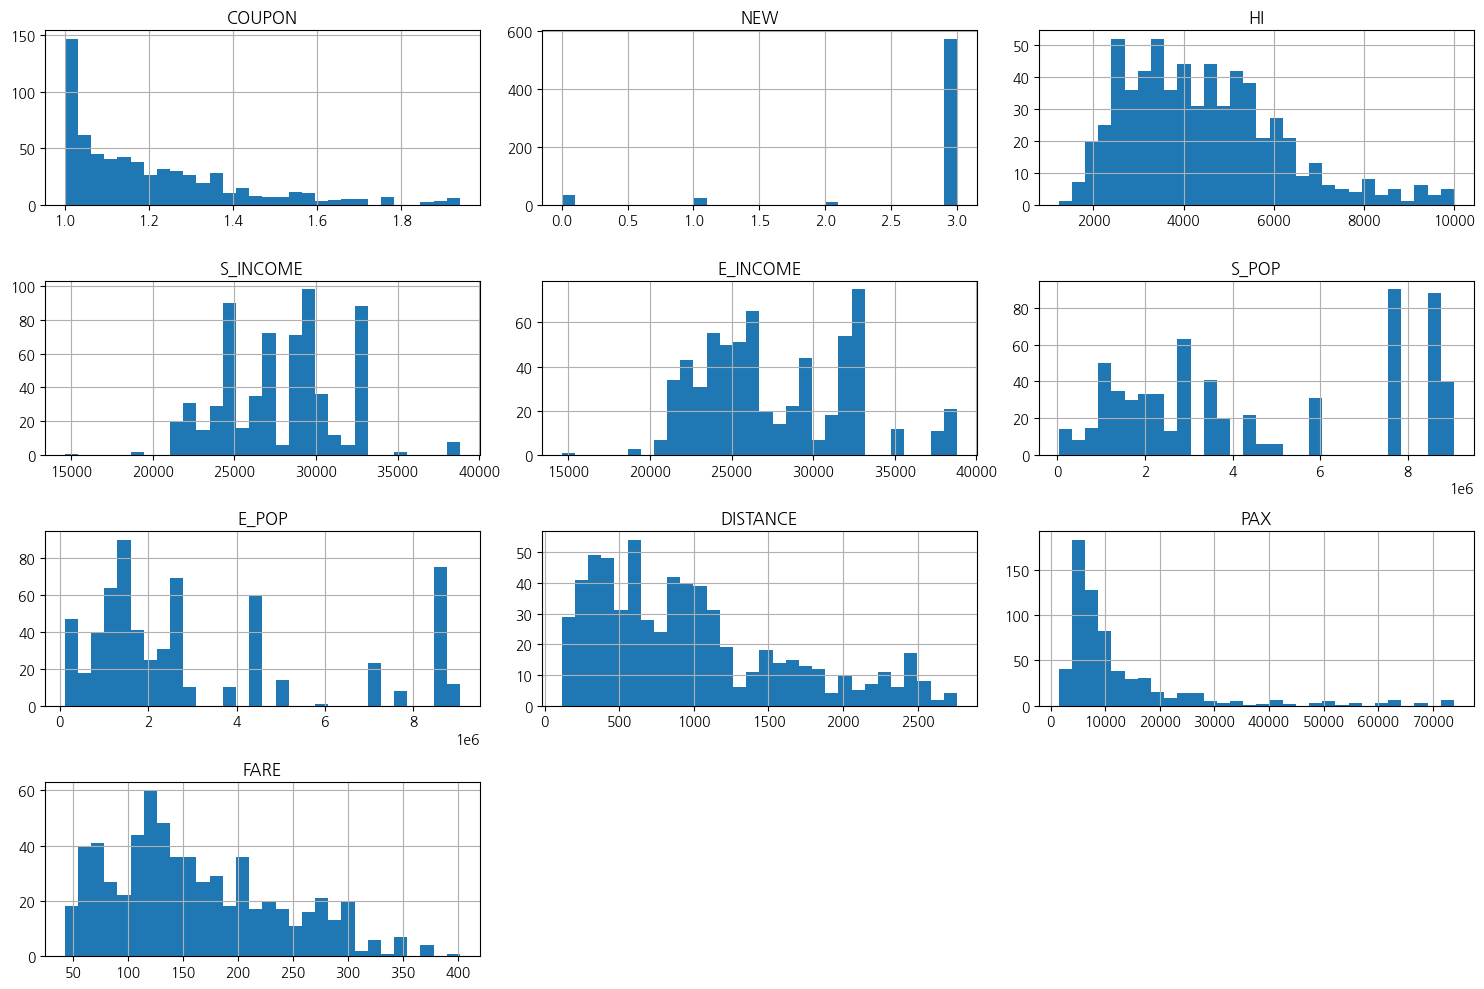

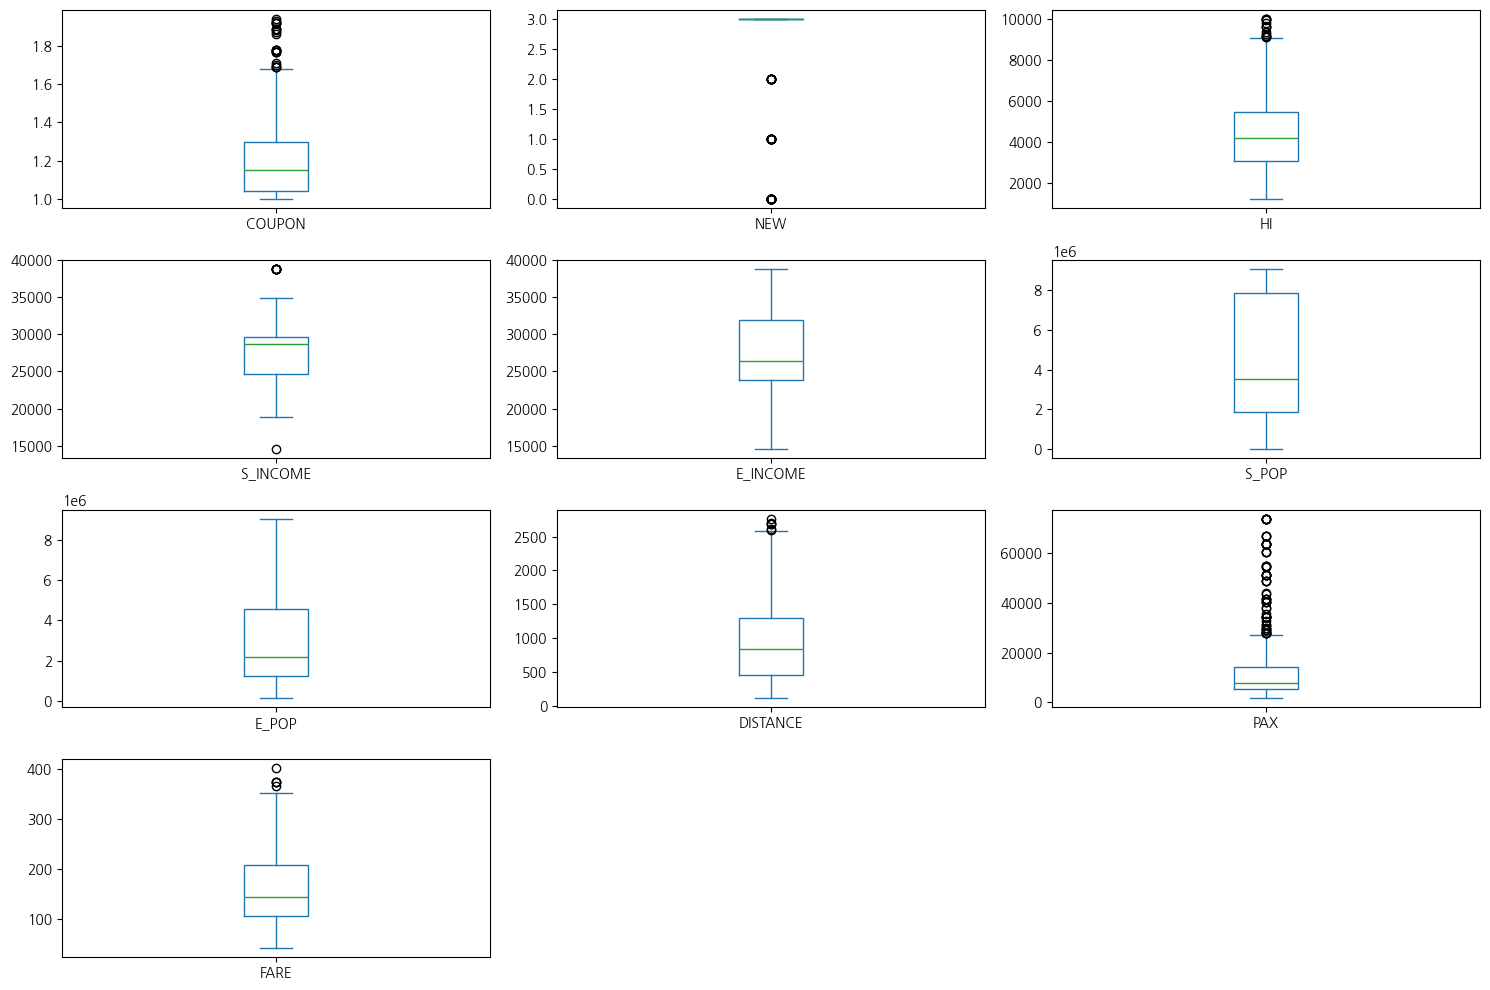

In [9]:
import matplotlib.pyplot as plt

# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

FARE, HI, PAX 등 일부 변수에서 길게 뻗은 꼬리와 이상치 점들이 확인됨

특히 PAX는 7만 명을 초과하는 극단값으로, 스케일 조정이나 이상치 제거 필요성 존재

HI는 최대 10,000 이상으로 극단적으로 높은 값이 분포되어 있음

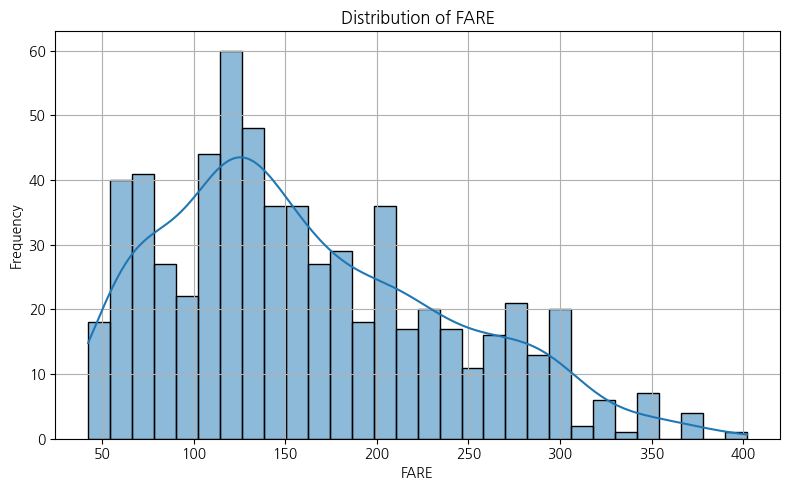

In [10]:
import seaborn as sns

# 타겟 변수 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df['FARE'], bins=30, kde=True)
plt.title("Distribution of FARE")
plt.xlabel("FARE")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


FARE 분포는 정규분포가 아닌 비대칭 분포이며, 오른쪽 꼬리가 긴 분포를 보임

평균보다 높은 고가 항공 요금이 일부 존재하며, 예측 모델의 정밀도를 위해 로그 변환 등의 정규화가 필요할 수 있음

KDE곡선으로 보면 대부분의 요금은 100~200달러에 집중되어 있음

왜도(Skewness) 결과, AMOUNT, DURATION, AGE 변수는 모두 **양의 왜도(> 0)**를 보였다.

특히 AMOUNT는 왜도가 약 1.95로 오른쪽 꼬리가 길게 분포된 비대칭 형태임을 나타낸다.

이는 고액 대출 사례가 소수 존재함을 의미하며, 로그 변환 등의 정규화가 필요할 수 있다.


첨도(Kurtosis) 결과, AMOUNT는 첨도가 5.7로 **뾰족한 분포(Leptokurtic)**이며,
이는 평균 부근에 많은 값이 몰려 있고, 동시에 극단값(이상치)도 존재함을 의미한다.

반면 AGE, DURATION 등은 첨도가 3에 가까워 정규분포에 비교적 유사한 형태를 보인다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# 2. 변경된 데이터셋 Phase 1 -프로젝트 준비 및 탐색



# 신규노선 항공운임예측


# **1. 프로젝트 정의 및 목표 설정**

📌 문제 정의

항공 요금 예측 정확도를 개선하기 위해, 기존 모델에 더해 K-NN, 랜덤 포레스트 등의 추가 모델을 구축하고, 성능 비교를 통해 최적 모델을 탐색한다. 이를 통해 소비자 및 항공사의 합리적 의사결정을 지원할 수 있는 예측 시스템을 고도화한다.



🧾 데이터 정의

사용 데이터: 수정된 Airfares_simple_garbled.csv


전처리 사항:

결측치 존재 여부 확인 및 제거

이상치 탐지 (예: 음수 Amount) 및 처리

문자열 비일관성 (예: 대소문자 혼용, 공백 포함)을 통일

범위 오류 (불가능한 값) 확인 및 수정



🎯 성공 지표

모델 예측 정확도: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error)

모델 성능 비교를 통해 기존 모델 대비 예측력 향상 여부를 검증

과적합 여부를 고려한 일반화 성능 (검증셋 기준)



💡 기대 효과 및 제약 조건

기대 효과:


다양한 모델 비교를 통한 최적 예측모델 도출

데이터 정제에 기반한 신뢰도 높은 분석 결과 확보

항공 요금 정책 또는 소비자 의사결정에 유용한 인사이트 제공



제약 조건:

이상치·결측치 수정 과정에서 정보 손실 발생 가능

고차원 특성을 고려하지 않는 경우 일부 모델에서 성능 저하 가능성

데이터 출처와 구성상, 실제 시장의 복잡성을 완전 반영하기는 어려움

# **2. 데이터 수집 및 로드**

In [11]:
#수정된 데이터 파일 불러오기
from google. colab import files
uploaded=files.upload()

Saving Airfares_simple_garbled.csv to Airfares_simple_garbled (1).csv


In [12]:
#기존 데이터 파일도 다시 불러옴
from google. colab import files
uploaded=files.upload()

Saving Airfares.csv to Airfares (1).csv


In [13]:
import pandas as pd
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

# 원본 데이터셋 변수
df = pd.read_csv('Airfares.csv')

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [14]:
# ✅ 수치형 데이터 기술 통계량 확인
df2.describe()


,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,648.000000,648.000000,648.000000,616.000000,615.000000,6.480000e+02,6.480000e+02,617.000000,617.000000,648.000000
mean,1.201944,2.756173,4443.943380,27742.331169,27545.308943,4.561558e+06,3.190555e+06,1047.669368,12657.116694,158.158827
std,0.202933,0.755685,1722.601245,3590.301994,4609.631624,3.015805e+06,2.730106e+06,1267.277578,12917.285290,82.132518
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,-234.150000
25%,1.040000,3.000000,3095.872500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,450.000000,5275.000000,105.340000
50%,1.150000,3.000000,4208.185000,27994.000000,26409.000000,3.532657e+06,2.195215e+06,844.000000,7785.000000,143.440000
75%,1.300000,3.000000,5485.617500,29260.000000,31981.000000,7.830332e+06,4.549784e+06,1389.000000,14005.000000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,24440.000000,73892.000000,402.020000


FARE 변수는 평균 약 158, 최소값은 -234, 최대값은 402로 나타났으며, 음수 운임이 존재해 데이터 오류 가능성이 있다.

DISTANCE와 PAX도 최대값 기준으로 이상치가 포함되어 있을 수 있다.

In [15]:
# ✅ 범주형 변수: 고유값 및 빈도수 확인
categorical_cols = df2.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())


📌 S_CODE (고유값 8개)
S_CODE
*      462
ORD     45
MDW     45
EWR     31
JFK     30
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY (고유값 64개)
S_CITY
New York/Newark     NY    89
Chicago             IL    86
Atlanta             GA    40
Dallas/Fort Worth   TX    38
Los Angeles         CA    34
                          ..
san francisco       ca     1
Anchorage           AK     1
Pittsburgh          PA     1
new orleans         la     1
phoenix             az     1
Name: count, Length: 64, dtype: int64

📌 E_CODE (고유값 8개)
E_CODE
*      509
DCA     28
IAD     27
JFK     26
EWR     25
LGA     25
MDW      4
ORD      4
Name: count, dtype: int64

📌 E_CITY (고유값 81개)
E_CITY
New York/Newark     NY        73
Washington          DC        55
Phoenix             AZ        24
Orlando             FL        23
Baltimore/Wash Intl MD        23
                              ..
  San Francisco       CA       1
Spokane             WA         1
  San Jose            CA       1
  Tucson    

SW, VACATION, SLOT, GATE 등의 변수는 각각 2~3개의 고유값으로 구성되어 있었으며, 일부 변수(VACATION)는 대소문자 불일치로 값이 나뉘어 있는 것으로 보였다.

In [16]:
# 1. 결측치 찾기
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")

=== 1. 결측치 (Missing Values) ===
S_INCOME    32
E_INCOME    33
DISTANCE    31
PAX         31
dtype: int64 



S_INCOME, E_INCOME, DISTANCE, PAX에서 결측치가 확인되었으며, 각각 약 4~5% 정도의 비율을 차지한다.

In [17]:
# 2. 문자열 공백(Whitespace) 찾기
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}  # 공백 발생한 값 담을 딕셔너리

for col in df2.select_dtypes(include='object').columns:  # 문자열 컬럼만 골라서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # 공백이 있는 값 탐지
    if mask.any():  # 공백이 존재한다면
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])

=== 2. 문자열 공백(Whitespace) 문제 ===

Column: E_CITY
36       Charlotte           NC  
51       Cleveland           OH  
101      Hartford            CT  
103      Honolulu (Intl)     HI  
113      Houston             TX  
178      Miami               FL  
195      Minneapolis/St Paul MN  
235      New York/Newark     NY  
243      New York/Newark     NY  
275      New York/Newark     NY  
360      Phoenix             AZ  
443      Salt Lake City      UT  
487      San Francisco       CA  
499      San Jose            CA  
568      Tucson              AZ  
Name: E_CITY, dtype: object


In [18]:
# 앞 뒤로 공백있는 문자열 공백값 존재 예시 출력

df['E_CITY'][36]

'Charlotte           NC'

In [19]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}

for col in df2.select_dtypes(include='object').columns:  # 문자열 타입 컬럼만 탐색
    vals = df2[col].dropna().astype(str)                 # 결측치 제거 후 문자열 변환
    lower_vals = vals.str.lower()                        # 모두 소문자로 변환
    unique_lower = lower_vals.unique()                   # 소문자 기준 유니크 값 추출

    for base in unique_lower:
        variants = sorted(vals[lower_vals == base].unique())
        if len(variants) > 1:  # 대소문자 차이가 존재함
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants

    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")


=== 3. 대소문자 불일치(Case Inconsistency) ===

Column: S_CITY
  Base ('atlanta             ga') -> Variants: ['Atlanta             GA', 'atlanta             ga']
  Base ('boston              ma') -> Variants: ['Boston              MA', 'boston              ma']
  Base ('chicago             il') -> Variants: ['Chicago             IL', 'chicago             il']
  Base ('fort lauderdale     fl') -> Variants: ['Fort Lauderdale     FL', 'fort lauderdale     fl']
  Base ('los angeles         ca') -> Variants: ['Los Angeles         CA', 'los angeles         ca']
  Base ('new orleans         la') -> Variants: ['New Orleans         LA', 'new orleans         la']
  Base ('new york/newark     ny') -> Variants: ['New York/Newark     NY', 'new york/newark     ny']
  Base ('orlando             fl') -> Variants: ['Orlando             FL', 'orlando             fl']
  Base ('phoenix             az') -> Variants: ['Phoenix             AZ', 'phoenix             az']
  Base ('san francisco       ca') -> Varian

In [20]:
# 4. 수치형 이상치(Outlier) 찾기 (원본 IQR 기준)
print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    o_col = df[col]  # 원본 데이터의 해당 컬럼 사용
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    g_col = pd.to_numeric(df2[col], errors='coerce')  # 수정된 데이터에서 숫자로 강제 변환
    mask = (g_col < lower) | (g_col > upper)

    if mask.any():
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))


=== 4. 수치형 이상치 (Outliers) ===

Column: COUPON - 23개 이상치 발견
     COUPON
18     1.86
19     1.93
20     1.87
129    1.71
166    1.92

Column: NEW - 67개 이상치 발견
    NEW
9     2
11    1
31    0
33    1
46    1

Column: HI - 14개 이상치 발견
          HI
2    9185.28
50   9350.13
148  9592.99
197  9249.13
324  9649.01

Column: S_INCOME - 9개 이상치 발견
     S_INCOME
21    38813.0
105   38813.0
129   38813.0
349   14600.0
387   38813.0

Column: DISTANCE - 9개 이상치 발견
     DISTANCE
103    2764.0
106    2679.0
162    2605.0
318   13080.0
376    2603.0

Column: PAX - 57개 이상치 발견
         PAX
42   30877.0
43   30877.0
82   34113.0
83   34113.0
104  32824.0

Column: FARE - 10개 이상치 발견
       FARE
36  -234.15
170 -193.50
346 -229.84
354 -195.91
474  367.72


In [21]:
# 5. 음수 값(Negative Values) 찾기 => 범위오류 (불가능한 값)
print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}

for col in df2.select_dtypes(include=['int64', 'float64']).columns:  # 수정된 데이터에서 수치형 컬럼 탐색
    g_col = pd.to_numeric(df2[col], errors='coerce')  # 숫자로 강제 변환
    neg_mask = g_col < 0  # 음수인 값만 추출
    if neg_mask.any():
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))


=== 5. 음수 값 (Negative Values) ===

Column: FARE - 5개 음수 값 발견
       FARE
36  -234.15
170 -193.50
346 -229.84
354 -195.91
562 -123.89


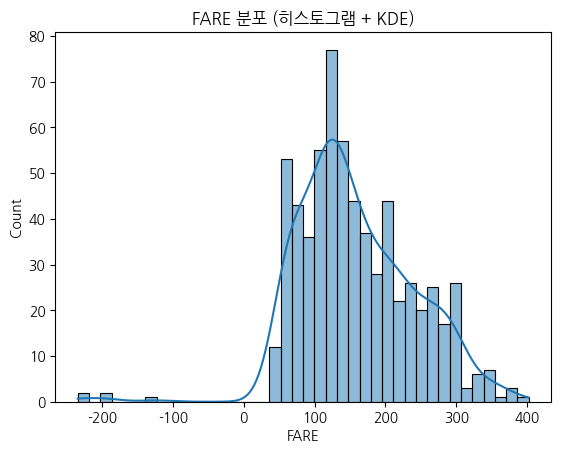

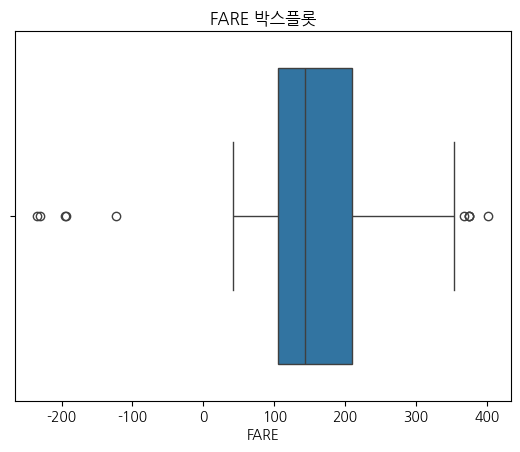

In [22]:
# ✅ 이상치 탐색: 히스토그램 + 박스플롯 (대표 수치형 변수)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['FARE'], bins=40, kde=True)
plt.title("FARE 분포 (히스토그램 + KDE)")
plt.xlabel("FARE")
plt.show()

sns.boxplot(x=df2['FARE'])
plt.title("FARE 박스플롯")
plt.show()

FARE 값은 주로 50~250 사이에 분포하며, 음수 값과 400 이상 값은 드물게 존재한다. 박스플롯에서도 극단값이 다수 존재함을 확인할 수 있다.

In [23]:
# ✅ 왜도 / 첨도 확인
print("Skewness (왜도):", df2['FARE'].skew())
print("Kurtosis (첨도):", df2['FARE'].kurt())

Skewness (왜도): -0.061571389535982075
Kurtosis (첨도): 1.8833914477955025


FARE의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포이며, 첨도는 1 이상으로 다소 뾰족한 형태를 보였다.

대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

# 변수 유형 분리 및 분포 확인

In [24]:
# ✅ 1. 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [25]:
# 원본 데이터셋 변수
df = pd.read_csv('Airfares.csv')

In [26]:
# 수정된 데이터셋 변수
df2 = pd.read_csv("Airfares_simple_garbled.csv")

In [27]:
# ✅ 4. 변수 분리 및 초기 설정
TARGET_COLUMN = 'FARE'  # 예측 목표 변수
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()  # 수치형 변수 자동 추출
categorical_cols = df2.select_dtypes(include='object').columns.tolist()  # 범주형 변수 자동 추출
numeric_cols.remove(TARGET_COLUMN)  # 타겟 변수는 제외

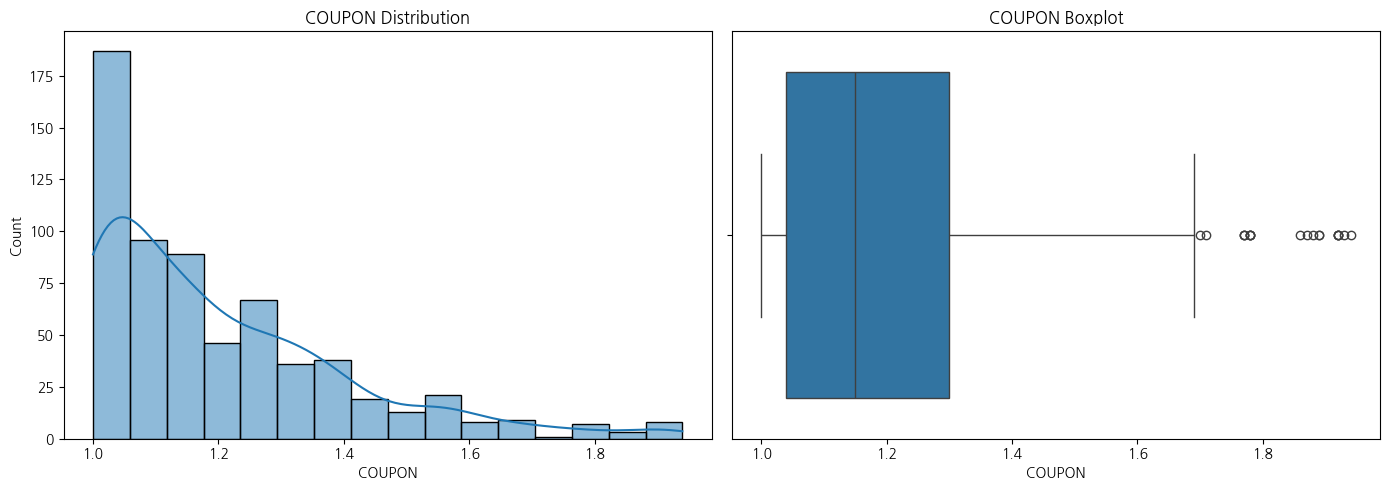

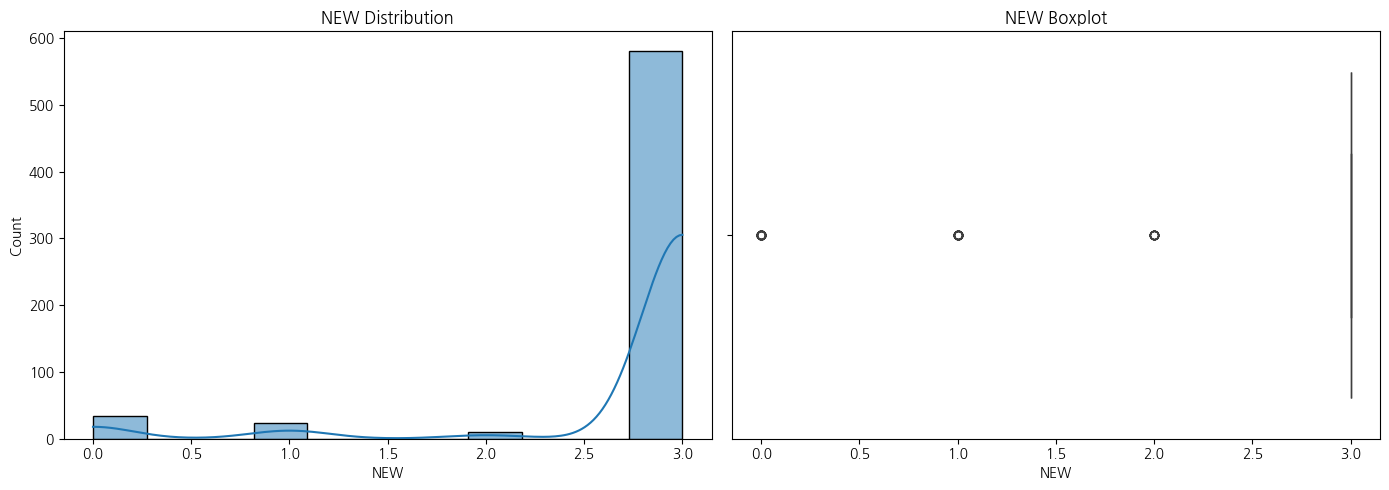

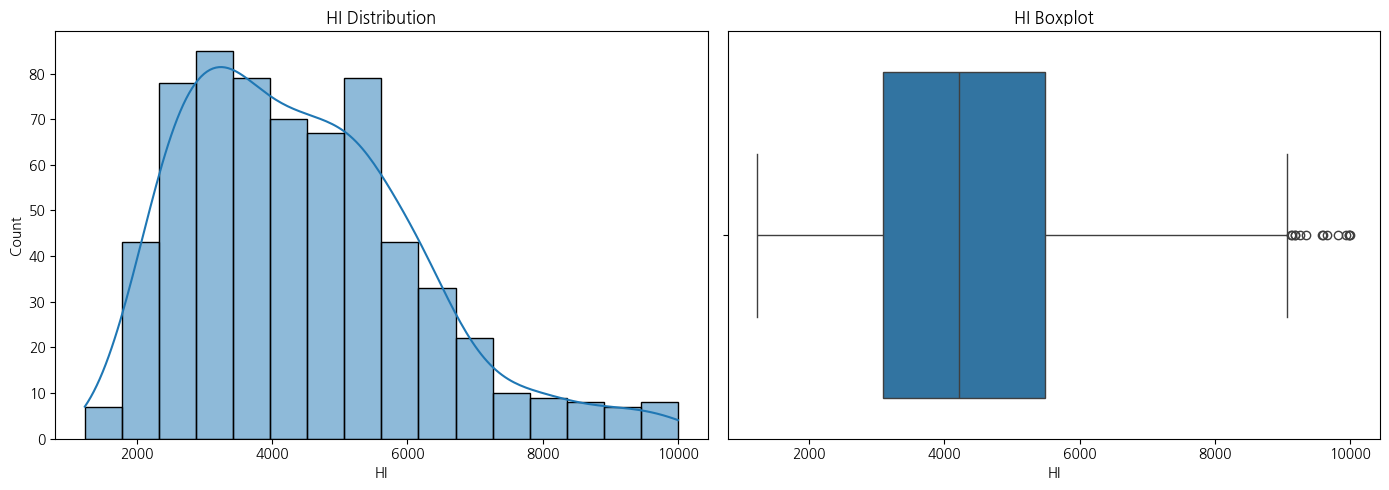

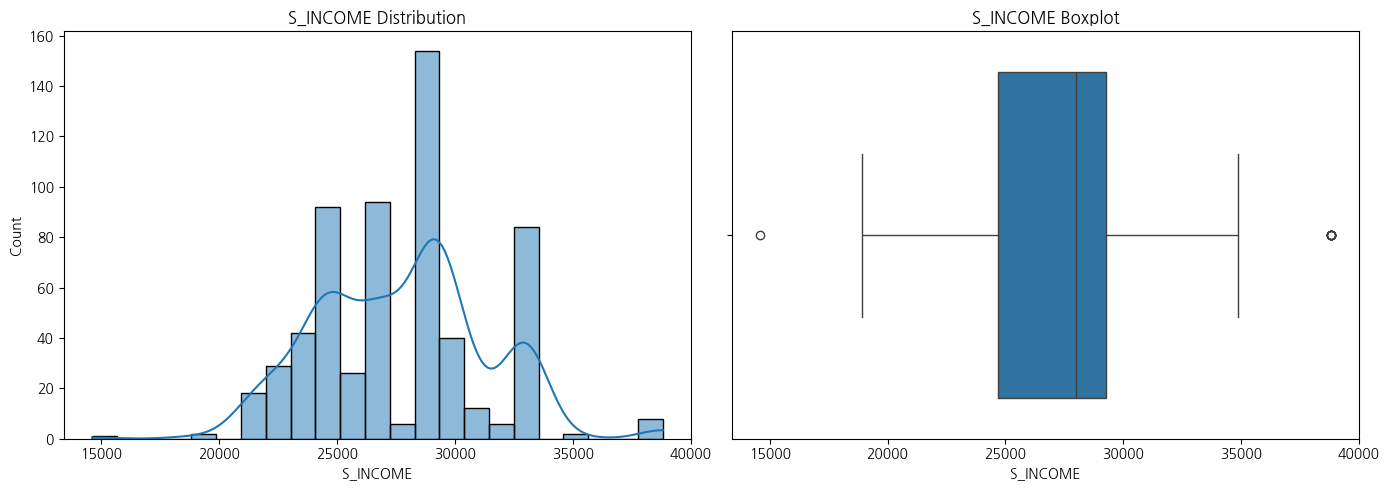

In [28]:
# ✅ 대표 수치형 변수 분포 시각화 (처음 4개)
# 히스토그램 + KDE로 분포 확인 / 박스플롯으로 이상치 확인
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')  # 분포 확인용
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')  # 이상치 확인용
    plt.tight_layout()
    plt.show()

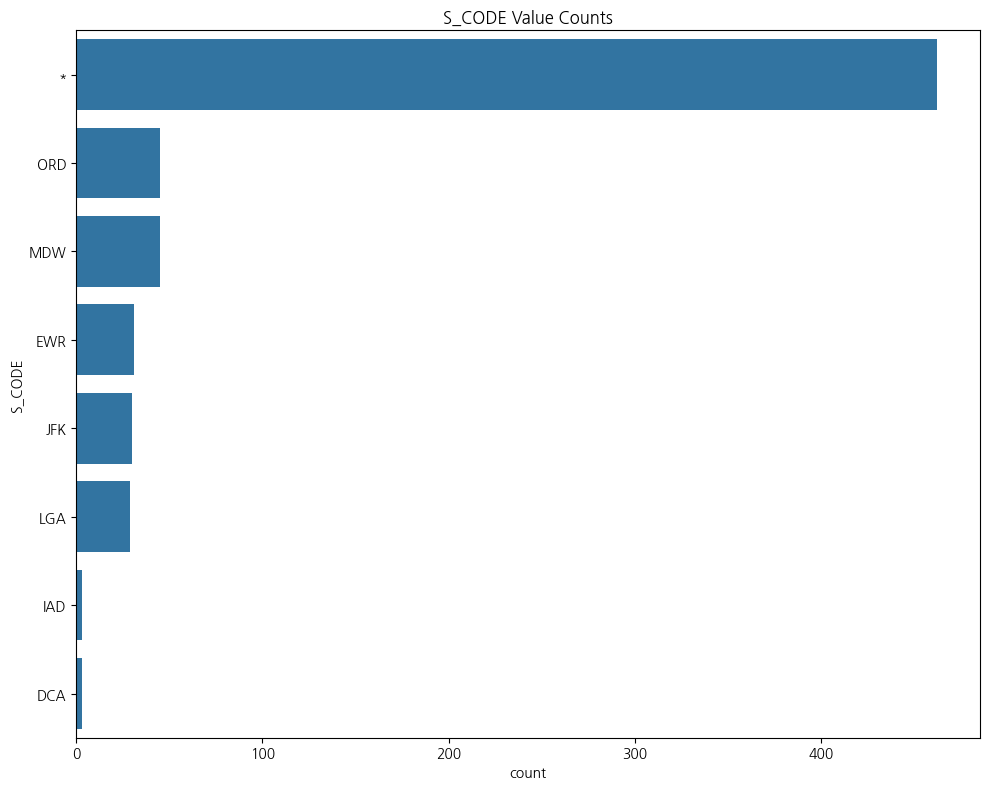

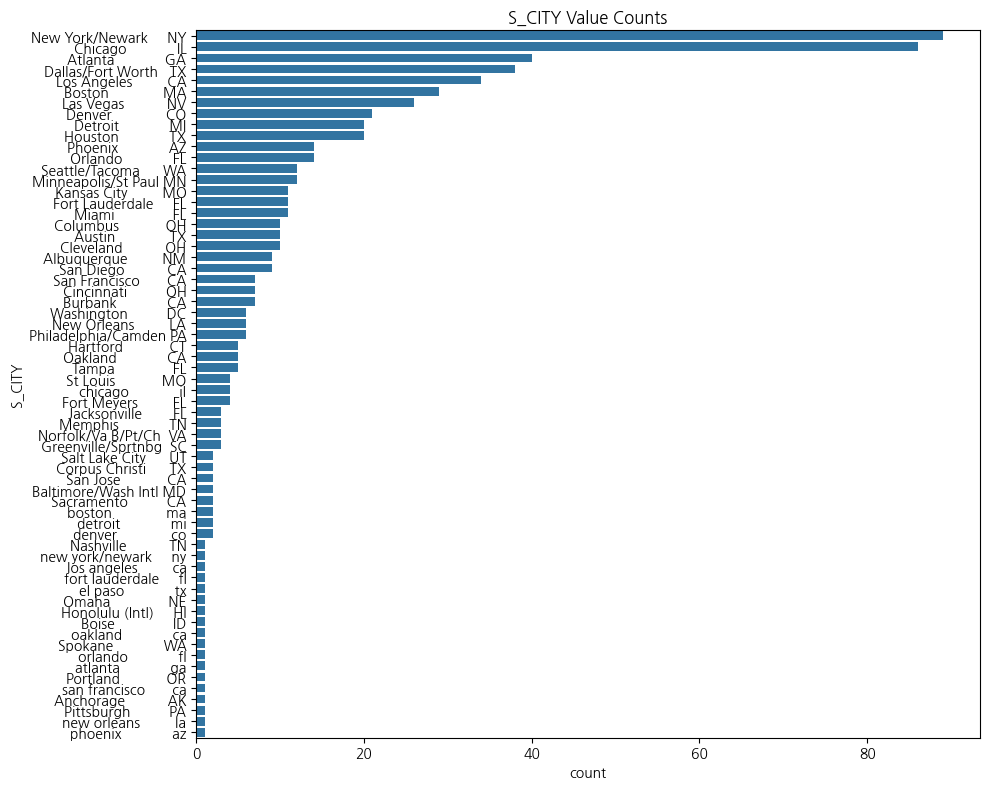

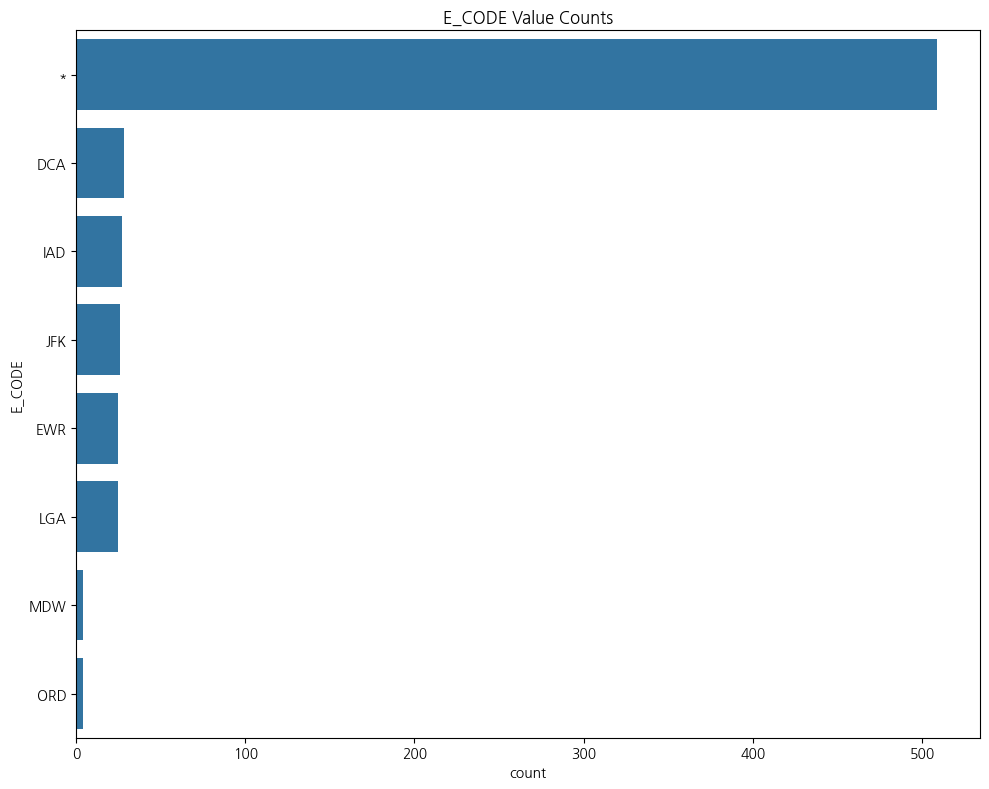

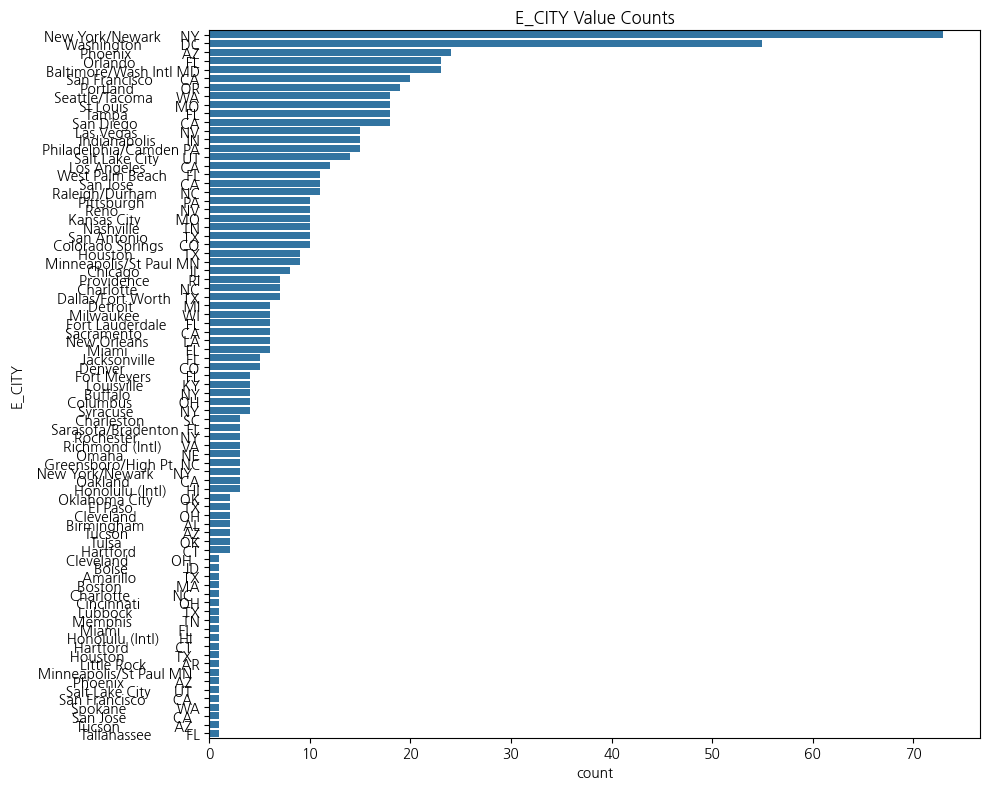

In [29]:
# ✅ 대표 범주형 변수 빈도수 시각화 (처음 4개, 가로 막대)
# 각 범주형 변수의 값 분포를 파악하여 데이터 불균형 여부 확인
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index  # 값 많은 순서대로 정렬
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')  # 범주 빈도 시각화
    plt.tight_layout()
    plt.show()

# 변수 간 관계분석(타겟 변수 중심)

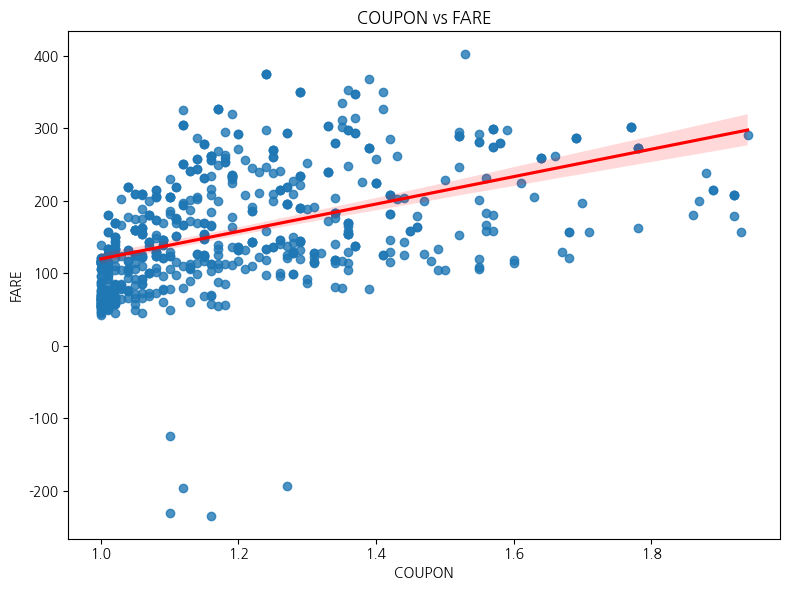

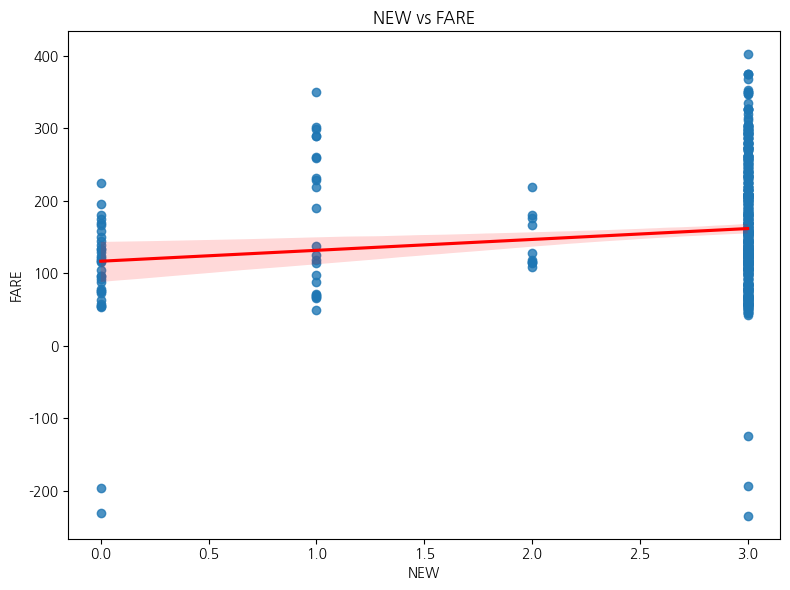

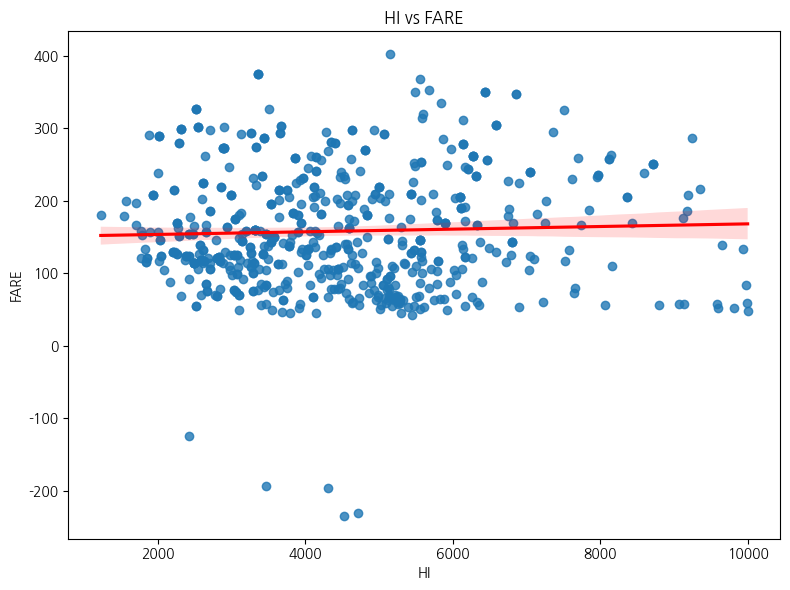

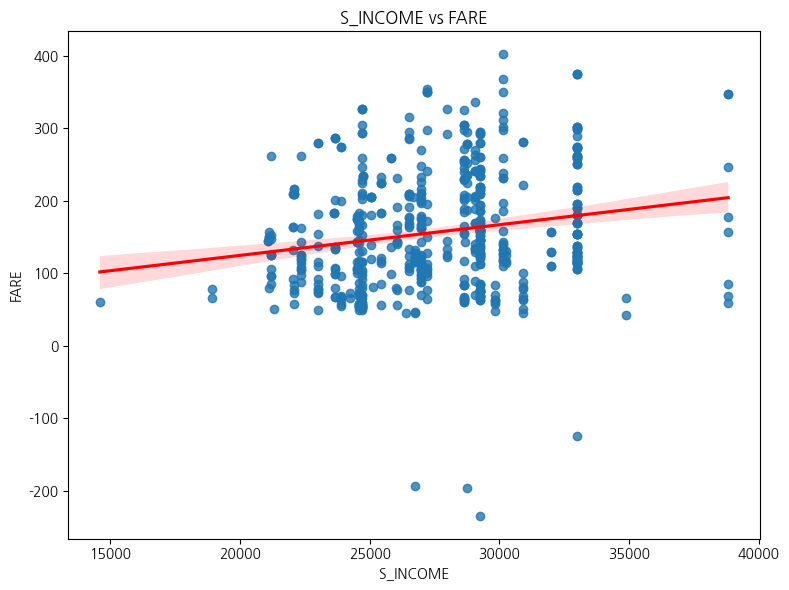

In [30]:
# ✅ 수치형 변수 vs 타겟 변수 관계 시각화 (산점도 + 회귀선)
# 회귀선을 통해 선형적 관계 여부를 시각적으로 확인
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

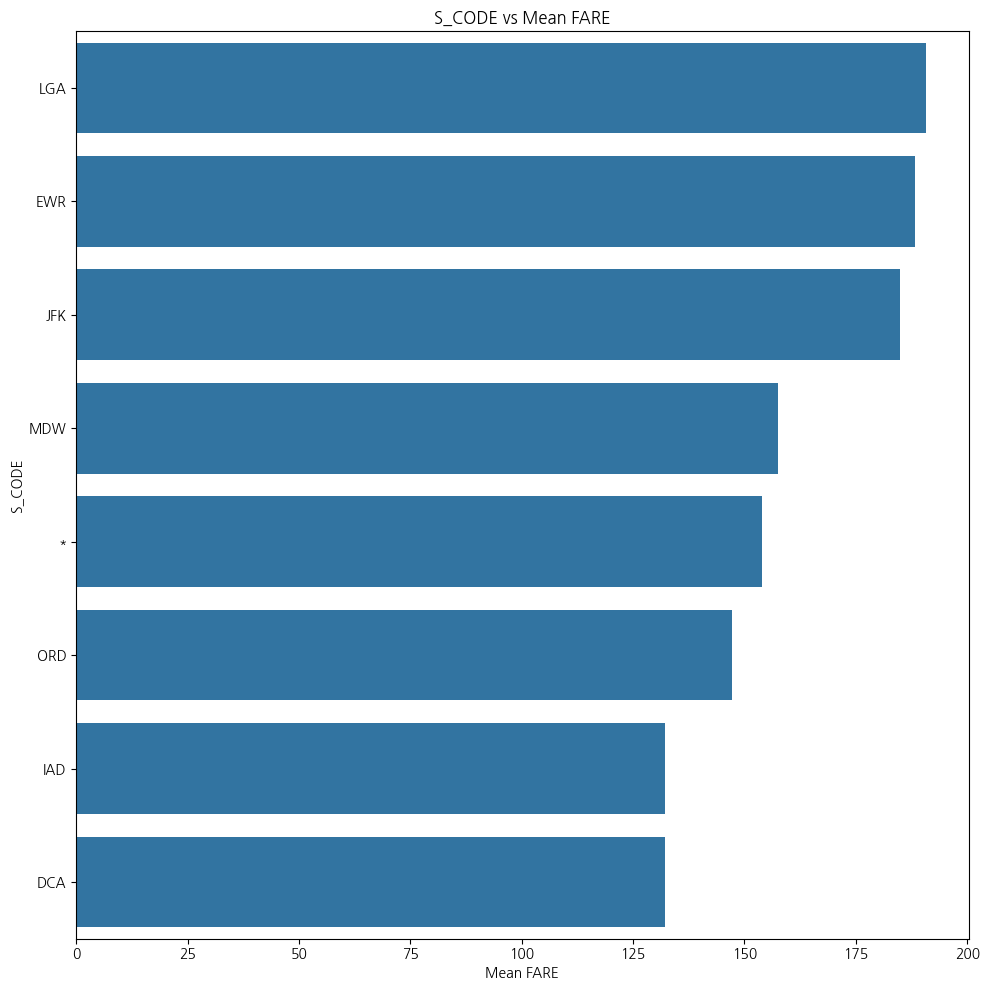

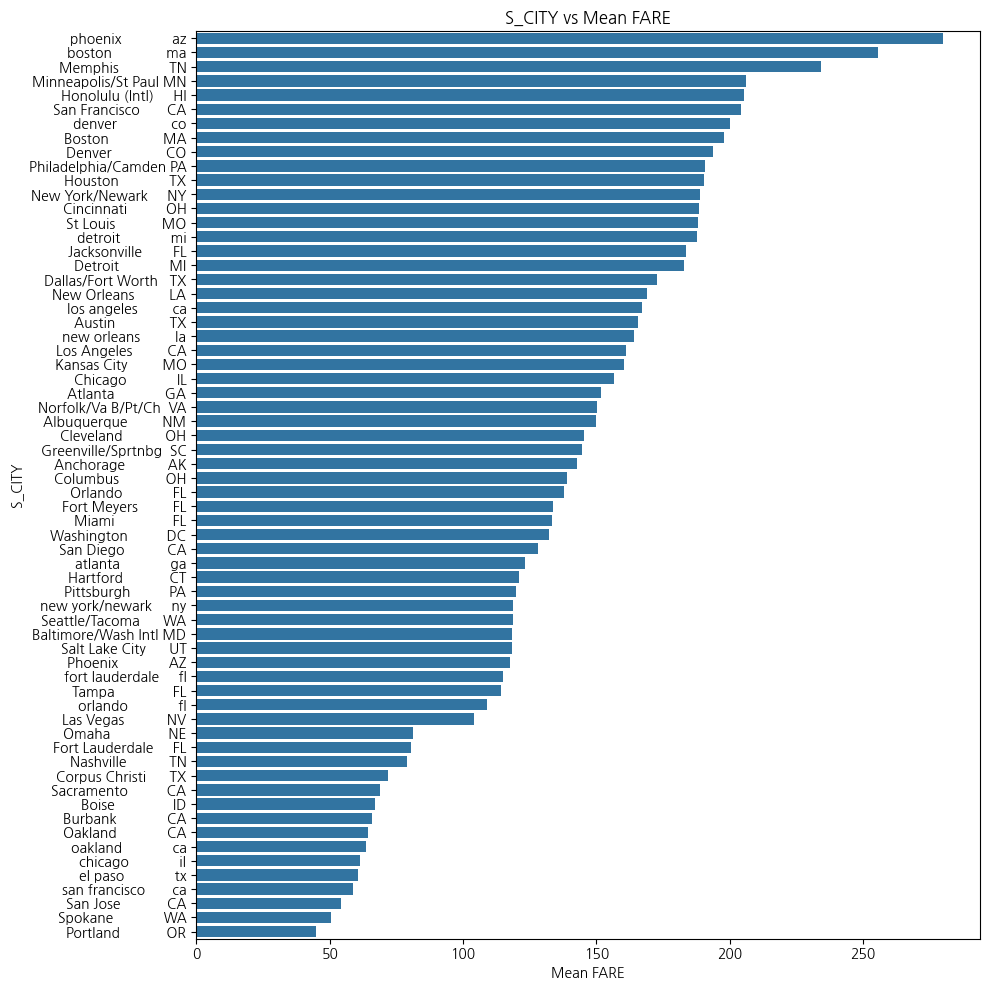

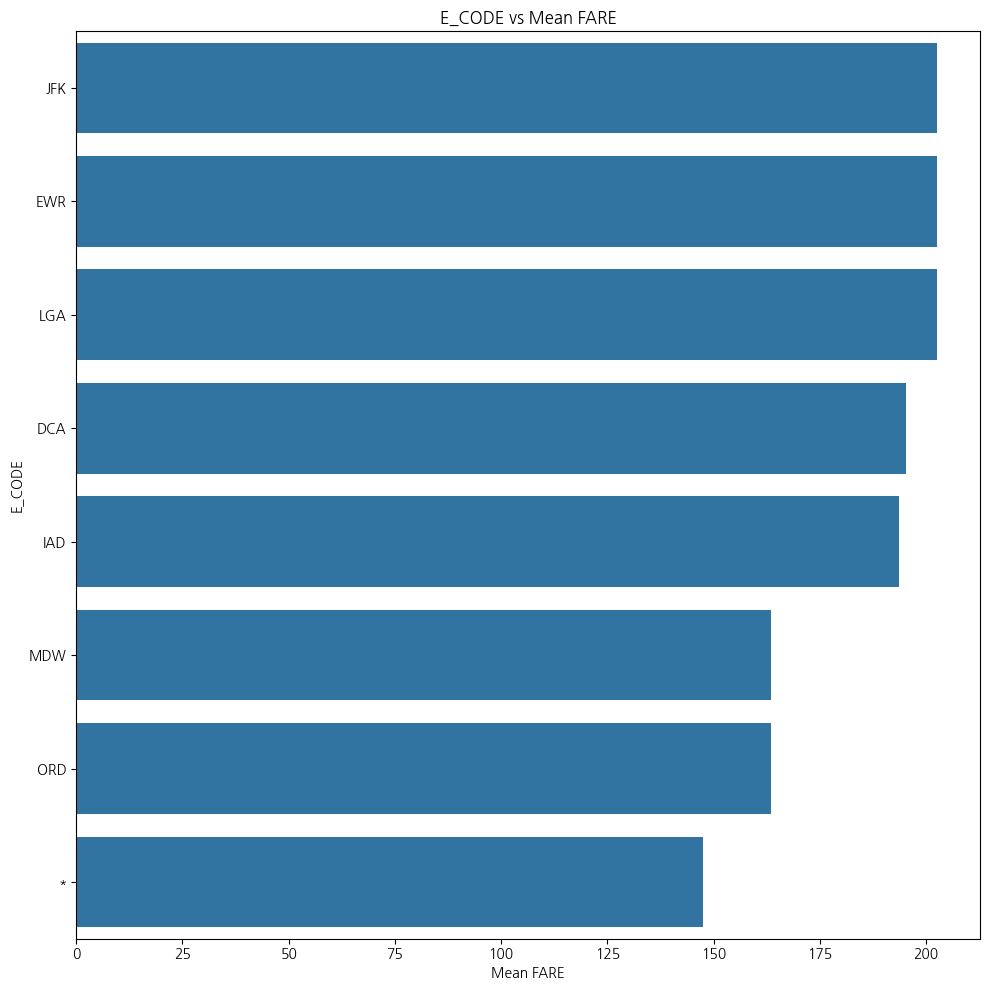

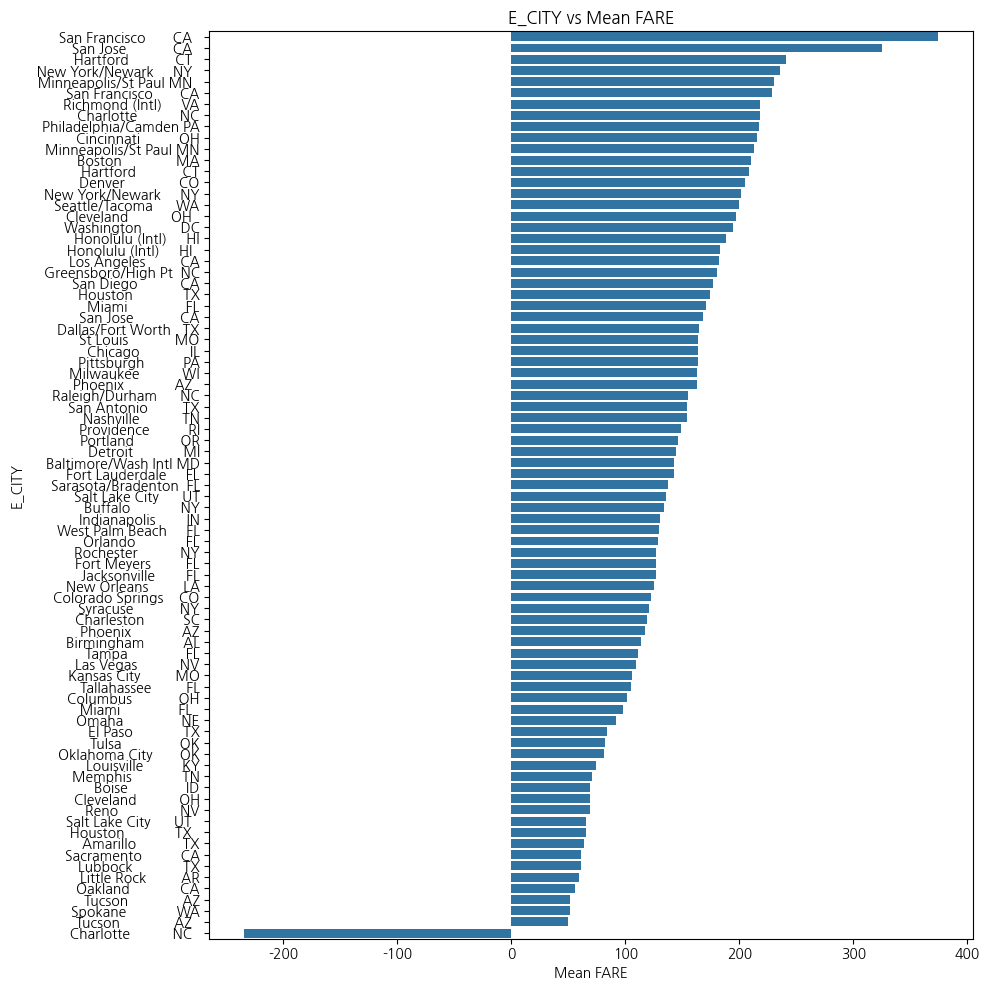

In [31]:
# ✅ 범주형 변수별 타겟 평균 시각화 (바 차트)
# 각 범주에 따라 요금 평균이 어떻게 달라지는지 시각화
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')  # 평균 요금 비교
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

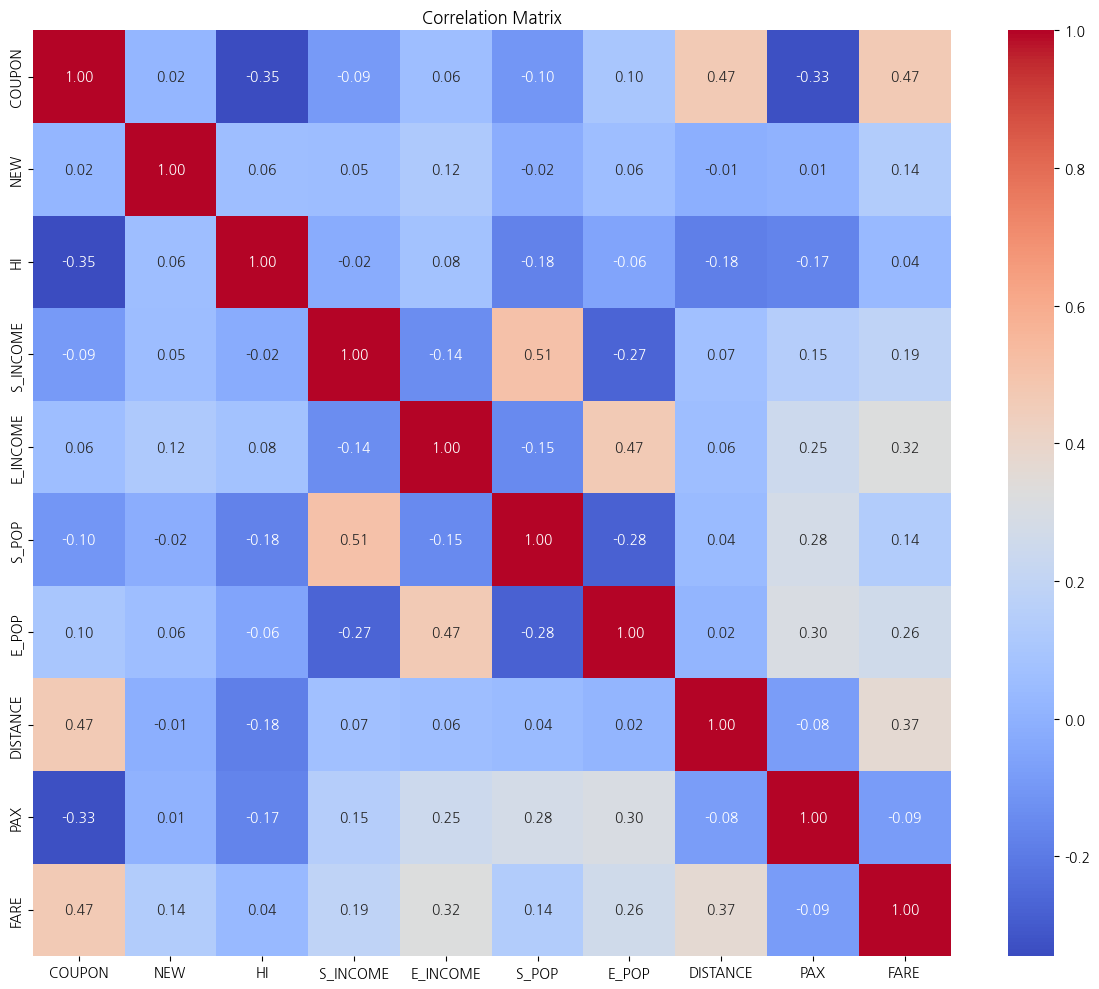

In [32]:
# ✅ 상관관계 히트맵
# 수치형 변수들 간의 상관관계를 한 눈에 시각적으로 확인
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")  # 변수 간 상관관계 분석
plt.tight_layout()
plt.show()

# 수정된 데이터 값 전처리
 (결측치, 이상치, 대소문자 불일치, 문자열 공백, 음수값(범위오류))


In [33]:
# 1. 결측치 처리 (숫자형): 원본 데이터의 중앙값(median)으로 대체
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_orig = df[col].median()
    df2[col] = pd.to_numeric(df2[col], errors='coerce')  # 숫자 아닌 경우 NaN 처리
    df2[col] = df2[col].fillna(median_orig)

In [34]:
# 결측치 처리 확인
missing_counts = df2.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("=== 1. 결측치 (Missing Values) ===")
print(missing_cols, "\n")

=== 1. 결측치 (Missing Values) ===
Series([], dtype: int64) 



In [35]:
# 2. 문자열 공백(Whitespace) 제거: 모든 문자열 컬럼의 앞뒤 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

In [36]:
# 문자열 공백(Whitespace) 처리 확인
print("=== 2. 문자열 공백(Whitespace) 문제 ===")
whitespace_issues = {}                                    # 공백 발생한 값 담을 딕셔너리
for col in df2.select_dtypes(include='object').columns:                       # 문자열만을 골라내서
    mask = df2[col].apply(lambda x: isinstance(x, str) and (x != x.strip()))  # x != x.strip() / 실제값 x가 양쪽 공백을 제거한 x와 다르다면,
    if mask.any():                                                           # 공백이 존재한다는 의미. => 문자열 공백 이슈가 발생한 값
        whitespace_issues[col] = df2.loc[mask, col]
        print(f"\nColumn: {col}")
        print(df2.loc[mask, col])

=== 2. 문자열 공백(Whitespace) 문제 ===


In [37]:
# 3. 대소문자 통일 (Case Consistency)

# 1) 문자열 공백 제거
string_cols = df2.select_dtypes(include='object').columns
for col in string_cols:
    df2[col] = df2[col].astype(str).str.strip()

# 2) 도시명(S_CITY, E_CITY)은 Title Case(원본데이터와 같게 앞글자만 대문자)로
for col in ['S_CITY', 'E_CITY']:
    if col in df2.columns:
        df2[col] = df2[col].str.title()

# 3) VACATION 컬럼은 원본처럼 “Yes”/“No” 형태로 Title Case 처리
if 'VACATION' in df2.columns:
    df2['VACATION'] = df2['VACATION'].str.strip().str.title()

In [38]:
# 3. 대소문자 불일치(Case Inconsistency) 찾기
print("\n=== 3. 대소문자 불일치(Case Inconsistency) ===")
case_issues = {}
for col in df2.select_dtypes(include='object').columns:   # 문자열 타입인 모든 컬럼의 값 가져와서 (결측치, 중복값제거, 문자열str만)
    vals = df2[col].dropna().astype(str)
    lower_vals = vals.str.lower()                        # 소문자로 모두 변환한 시리즈(base) 만들고
    unique_lower = lower_vals.unique()                   # “소문자 버전(base)”을 기준으로 동일 의미군(yes인지, no인지)을 먼저 묶고,
    for base in unique_lower:                               # 그 속에 서로 다른(대소문자만 다른) 원본 값들이 몇 개 있나를 확인해서,
        variants = sorted(vals[lower_vals == base].unique())   # 두 개 이상 나오면“대소문자 불일치”라고 판단.
        if len(variants) > 1:
            if col not in case_issues:
                case_issues[col] = {}
            case_issues[col][base] = variants
    if col in case_issues:
        print(f"\nColumn: {col}")
        for base, variants in case_issues[col].items():
            print(f"  Base ('{base}') -> Variants: {variants}")


=== 3. 대소문자 불일치(Case Inconsistency) ===


In [39]:
# 4. 수치형 이상치(Outliers) 처리: 원본 IQR 기준을 벗어난 값을 NaN 처리 후 중앙값 대체
for col in numeric_cols:
    # 원본 IQR 계산
    o_col = df[col]
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 수정된 데이터에서 이상치 필터링
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    outlier_mask = (df2[col] < lower) | (df2[col] > upper)
    df2.loc[outlier_mask, col] = np.nan

    # NaN(이상치로 표시된) 값을 중앙값으로 대체
    median_orig = df[col].median()
    df2[col] = df2[col].fillna(median_orig)


왜 굳이 '중앙값'으로 대체했을까?

이상치(Outlier)에 덜 민감함

평균은 이상치(극단적인 값)에 크게 영향을 받아, 왜곡될 수 있다. 반면 중앙값은 데이터의 중간값이므로, 몇 개의 극단치가 있어도 거의 변하지 않음.

비대칭 분포 앞서 데이터 탐색에서, 확인한 항공 운임(FARE)의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포였다. 이처럼 기울어진(skewed) 분포에서는 평균보다 중앙값이 대표값(central tendency)을 더 잘 반영한다.

단점

: 중앙값이 계속 반복해서 들어가면, 모든 음수 이상치 위치가 동일한 값(중앙값)으로 대체되어, 특정 구간에 “모두 똑같은 가격”이 몰려서 왜곡될 여지 있음.

In [40]:
# 4. 수치형 이상치(Outlier) 처리 확인

print("\n=== 4. 수치형 이상치 (Outliers) ===")
outlier_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:      # 수정된 데이터셋에서 정수, 실수 타입 데이터만 추
    o_col = df[col]                         # '원본 데이터!!'의 1사분위(하위 25% 지점)와 3사분위(상위 25% 지점)을 구함
    Q1 = o_col.quantile(0.25)
    Q3 = o_col.quantile(0.75)                     #  IQR = Q3 – Q1은 “중간 50% 자료가 퍼져 있는 범위” => 이상치 아닌 구간
    IQR = Q3 - Q1                                 #  일반적으로 QR의 1.5배를 경계로 삼아서
    lower = Q1 - 1.5 * IQR                          # 하한(lower fence) = Q1 − 1.5×IQR
    upper = Q3 + 1.5 * IQR                          # 상한(upper fence) = Q3 + 1.5×IQR 을 벗어난 값을 '이상치'로 간주 !
    g_col = pd.to_numeric(df2[col], errors='coerce')
    mask = (g_col < lower) | (g_col > upper)
    if mask.any():                                    # '수정된 데이터셋 값'이 '원본 데이터의 상한, 하한'을 벗어난다면 이상치로 간주 !
        outlier_indices[col] = df2.index[mask].tolist()
        print(f"\nColumn: {col} - {len(outlier_indices[col])}개 이상치 발견")
        print(df2.loc[outlier_indices[col][:5], [col]].to_string(index=True))


=== 4. 수치형 이상치 (Outliers) ===


In [41]:
# 5. 음수값 존재하는 행 '삭제'

# 음수값이 있는 행을 모두 제거하려면, 숫자형 컬럼 중 하나라도 음수인 행을 drop

# 1) 숫자형 컬럼 리스트
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) 음수값이 있는 행의 boolean mask 생성
#    (모든 숫자형 컬럼이 0 이상인 행만 True)
mask_non_negative = (df2[numeric_cols] >= 0).all(axis=1)

# 3) 음수가 하나라도 섞인 행(=mask_non_negative가 False인 행)을 drop
df2 = df2.loc[mask_non_negative].reset_index(drop=True)

음수값 존재하는 행 '삭제'하는 이유?

위에서 이상치를 중앙값으로 통일하면서 데이터의 분포가 지나치게 단순화돼 특정 구간(중앙값)에 너무 많은 데이터가 몰리게 되는 단점이 존재할 수 있음.

따라서, 음수값도 중앙값으로 대체하면 이 단점이 심화되기에, 행 삭제를 선택함.

목표변수인 FARE가 음수인 값이었기 때문에, 이 행 자체가 존재할 수 없다고 볼 수 있음. 따라서 삭제해도 무방할 것이라고 생각했음.

In [42]:
# 5. 음수 값 삭제 확인

print("\n=== 5. 음수 값 (Negative Values) ===")
negative_indices = {}
for col in df2.select_dtypes(include=['int64','float64']).columns:       # 정수, 실수형 데이터 값 중에
    g_col = pd.to_numeric(df2[col], errors='coerce')                # 문자열 등이 섞여 있을 경우에도 가능한 한 숫자로 바꿔주고, 변환이 불가능한 항목은 NaN으로 처리
    neg_mask = g_col < 0                                      # 해당 열의 값이 음수인 행만 true인 시리즈
    if neg_mask.any():                                             # 음수 값이 하나라도 있으면 사전에 저장, 해당 행의 인덱스와 샘플 출력
        negative_indices[col] = df2.index[neg_mask].tolist()
        print(f"\nColumn: {col} - {len(negative_indices[col])}개 음수 값 발견")
        print(df2.loc[negative_indices[col][:5], [col]].to_string(index=True))


=== 5. 음수 값 (Negative Values) ===


# **Phase3-모델링**

## **모델 구축 전 세부 전처리**

OLS모델과 KNN모델이 해야하는 전처리과정

공통: 결측치 처리, 이상치 처리, 원핫인코딩,

OLS모델: 다중공선성제거, 선형성 확인, 정규성/등분산성 확인, 정규화(선택)

KNN모델: 정규화



### **수정데이터 VIF계수 확인하는 코드(OLS모델)**

In [43]:
# 데이터 혼동을 방지하기 위해 데이터 복사
df2_OLS = df2.copy()
df2_KNN = df2.copy()

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 수치형 변수만 선택
numeric_df2_OLS = df2_OLS.select_dtypes(include=['int64', 'float64'])

# 종속변수 'FARE'는 제외
if 'FARE' in numeric_df2_OLS.columns:
    numeric_df2_OLS = numeric_df2_OLS.drop(columns='FARE')

# 상수항 추가
X_OLS = sm.add_constant(numeric_df2_OLS, has_constant='add')

# VIF 계산
vif_df2_OLS = pd.DataFrame()
vif_df2_OLS["feature"] = X_OLS.columns
vif_df2_OLS["VIF"] = [variance_inflation_factor(X_OLS.values, i) for i in range(X_OLS.shape[1])]

# VIF 높은 순으로 정렬 출력
print(vif_df2_OLS.sort_values(by='VIF', ascending=False))

    feature       VIF
8  DISTANCE  2.017914
1    COUPON  2.014144
6     S_POP  1.671543
4  S_INCOME  1.530023
7     E_POP  1.411715
5  E_INCOME  1.307905
3        HI  1.187355
9       PAX  1.135511
0     const  0.000000
2       NEW  0.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


결과 해석

- VIF > 10: 심각한 다중공선성 → 변수 제거 고려

- VIF 5~10: 주의 필요

- VIF < 5: 문제 없음

수정 데이터에서 VIF계수가 5를 넘는 변수는 없음.

즉, 다중공선성 문제가 발생할 가능성이 낮음.

### **선형성 확인 및 시각화하는 코드(OLS모델)**

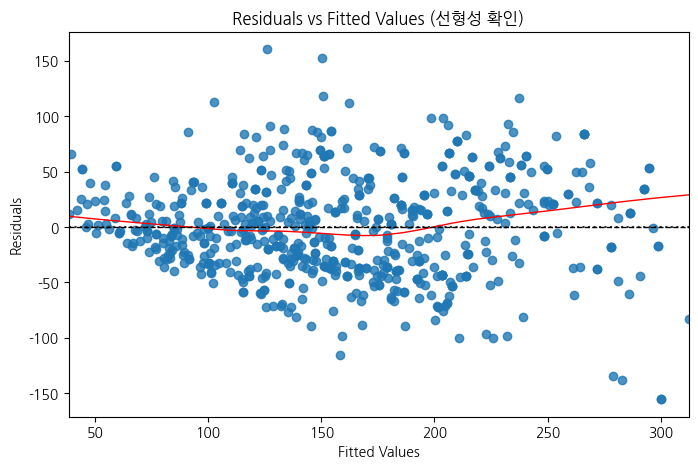

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# X, y 설정
X = df2[['COUPON','NEW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']]  # 독립변수
y = df2['FARE'] # 종속변수

# 상수항 추가
X_const = sm.add_constant(X)

# OLS 회귀모델 적합
model_OLS = sm.OLS(y, X_const).fit()

# 예측값과 잔차 계산
fitted_vals = model_OLS.fittedvalues
residuals = model_OLS.resid

# 잔차 vs 예측값 산점도
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (선형성 확인)")
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.show()

결과 해석

- 빨간 선(LOESS curve)이 U자형으로 휘어져 있음

- 잔차들이 예측값에 따라 특정 방향으로 체계적인 곡선 형태를 보임

- 잔차가 완전히 랜덤하게 퍼져 있지 않음

- 선형성가정위배

    OLS 회귀모형의 중요한 가정 중 하나인 선형성(linearity):

    독립변수와 종속변수 간에는 직선적(linear) 관계가 존재해야 함

    잔차가 예측값에 대해 곡선형태로 분포되어 있음

    이는 모델이 데이터의 비선형적 관계를 충분히 설명하지 못하고 있음을 의미



### **정규성/등분산성 확인하는 코드(OLS모델)**

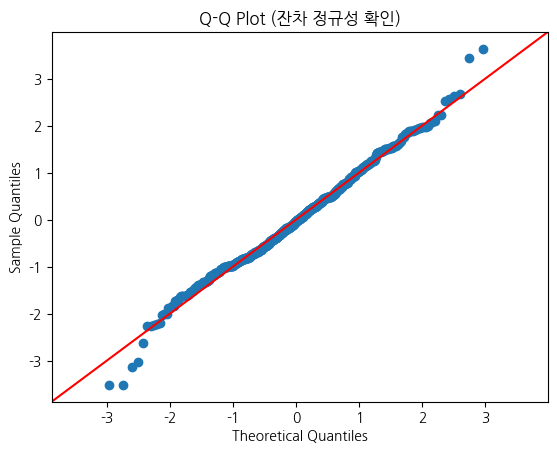

In [46]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot (잔차 정규성 확인)')
plt.show()

In [47]:
# Shapiro-Wilk Test (정규성 검정)
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: 통계량 = {stat:.3f}, p값 = {p:.3f}")
if p > 0.05:
    print("정규성 가정 충족 (p > 0.05)")
else:
    print("정규성 위배 (p ≤ 0.05)")

Shapiro-Wilk test: 통계량 = 0.994, p값 = 0.007
정규성 위배 (p ≤ 0.05)


In [48]:
# Breusch-Pagan Test (정량적 검정)
from statsmodels.stats.diagnostic import het_breuschpagan

# 예측값을 통해 Breusch-Pagan test 수행
bp_test = het_breuschpagan(residuals, model_OLS.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val:.4f}")

# 해석
if bp_test[1] > 0.05:
    print("등분산성 가정 충족 (p > 0.05)")
else:
    print("등분산성 위배 (p ≤ 0.05)")

LM Statistic: 67.2790
LM p-value: 0.0000
F-statistic: 9.2539
F p-value: 0.0000
등분산성 위배 (p ≤ 0.05)


결과 해석

Q-Q Plot: 점이 대각선의 형태

Shapiro-Wilk Test (정규성 검정): p값 = 0.007 (p > 0.05)

정규성 위배

정규화 필요

Breusch-Pagan Test (정량적 검정): LM p-value: 0.0000, F p-value: 0.0000 (p ≤ 0.05)

등분산성 위배



### **원핫인코딩코드(공통**)

In [49]:
#  범주형 변수 자동 탐지
categorical_cols_df2 = df2.select_dtypes(include=['object', 'category']).columns.tolist()

# 원핫인코딩 적용 (drop_first=True는 다중공선성 방지를 위해 하나 제거)
df_categorial_df2_encoded = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

# 결과를 0과 1 (정수형)로 변환
df_categorial_df2_encoded = df_categorial_df2_encoded.astype(int)

# 결과 확인
print(df_categorial_df2_encoded.head())
print(f"원핫인코딩 후 변수 수: {df_categorial_df2_encoded.shape[1]}")

   COUPON  NEW    HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE    PAX  \
0       1    3  5291     28637     21112  3036732   205711       312   7864   
1       1    3  5419     26993     29838  3532657  7145897       576   8820   
2       1    3  4208     28637     29838  5787293  7145897       364   6452   
3       1    3  2657     29260     29838  7830332  7145897       612  25144   
4       1    3  2657     29260     29838  7830332  7145897       612  25144   

   FARE  ...  E_CITY_Tallahassee         Fl  E_CITY_Tampa               Fl  \
0    64  ...                              0                              0   
1   174  ...                              0                              0   
2   207  ...                              0                              0   
3    85  ...                              0                              0   
4    85  ...                              0                              0   

   E_CITY_Tucson              Az  E_CITY_Tulsa          

### **수치형 변수 정규화코드(공통)**

In [50]:
from sklearn.preprocessing import StandardScaler

# FARE을 제외한 수치형 변수 선택
numerical_cols = df_categorial_df2_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('FARE')

# 정규화 객체 생성
scaler = StandardScaler()

# 정규화 수행
df2_KNN_scaled = df_categorial_df2_encoded.copy()
df2_KNN_scaled[numerical_cols] = scaler.fit_transform(df_categorial_df2_encoded[numerical_cols])

# 결과 확인
print(df2_KNN_scaled[numerical_cols].head())

   COUPON  NEW        HI  S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE  \
0     0.0  0.0  0.623745  0.294534 -1.418650 -0.506002 -1.094152 -1.050074   
1     0.0  0.0  0.706647 -0.212785  0.523042 -0.341433  1.449906 -0.620183   
2     0.0  0.0 -0.077687  0.294534  0.523042  0.406751  1.449906 -0.965398   
3     0.0  0.0 -1.082231  0.486784  0.523042  1.084719  1.449906 -0.561561   
4     0.0  0.0 -1.082231  0.486784  0.523042  1.084719  1.449906 -0.561561   

        PAX  S_CODE_DCA  ...  E_CITY_Tallahassee         Fl  \
0 -0.218137   -0.068199  ...                      -0.039314   
1 -0.031395   -0.068199  ...                      -0.039314   
2 -0.493951   -0.068199  ...                      -0.039314   
3  3.157271   -0.068199  ...                      -0.039314   
4  3.157271   -0.068199  ...                      -0.039314   

   E_CITY_Tampa               Fl  E_CITY_Tucson              Az  \
0                      -0.169031                      -0.068199   
1                 

## **데이터분할**

In [51]:
# 데이터 혼동을 방지하기 위해 데이터 복사
df2_OLS = df2_KNN_scaled.copy()
df2_KNN = df2_KNN_scaled.copy()

In [52]:
from sklearn.model_selection import train_test_split

# OLS모델 데이터분할

# 학습데이터(60%), 임시데이터(40%)로 분할
df2_OLS_train, df2_OLS_temp = train_test_split(df2_OLS, test_size=0.4, random_state=42)

# 임시데이터를 검증데이터(50%), 테스트데이터(50%)로 분할
df2_OLS_val, df2_OLS_test = train_test_split(df2_OLS_temp, test_size=0.5, random_state=42)

# 종속변수
y_OLS_train = df2_OLS_train['FARE']
y_OLS_val = df2_OLS_val['FARE']
y_OLS_test = df2_OLS_test['FARE']

# 독립변수
X_OLS_train = df2_OLS_train.drop(columns='FARE')
X_OLS_val = df2_OLS_val.drop(columns='FARE')
X_OLS_test = df2_OLS_test.drop(columns='FARE')

# 결과 확인
print(f"Train_OLS set: {df2_OLS_train.shape}")
print(f"Validation_OLS set: {df2_OLS_val.shape}")
print(f"Test_OLS set: {df2_OLS_test.shape}")

# KNN모델 데이터분할
y_KNN = df2_KNN['FARE']
X_KNN = df2_KNN.drop(columns='FARE')

# 학습데이터(60%), 임시데이터(40%)로 분할
X_KNN_train, X_KNN_temp, y_KNN_train, y_KNN_temp = train_test_split(X_KNN, y_KNN, test_size=0.4, random_state=42)

# 임시데이터를 검증데이터(50%), 테스트데이터(50%)로 분할
X_KNN_val, X_KNN_test, y_KNN_val, y_KNN_test = train_test_split(X_KNN_temp, y_KNN_temp, test_size=0.5, random_state=42)

# 확인
print(f"Train_KNN size: {X_KNN_train.shape[0]} rows")
print(f"Validation_KNN size: {X_KNN_val.shape[0]} rows")
print(f"Test_KNN size: {X_KNN_test.shape[0]} rows")

Train_OLS set: (388, 145)
Validation_OLS set: (130, 145)
Test_OLS set: (130, 145)
Train_KNN size: 388 rows
Validation_KNN size: 130 rows
Test_KNN size: 130 rows


## **모델선택**

모델을 선택할 때 고려해야 할 사항에는 문제 유형(분류/회귀), 데이터의 크기 및 특성, 모델의 복잡도, 해석 용이성, 훈련 시간, 모델의 가정(예: 선형 회귀의 가정) 등이 있음.

문제 유형은 항공운임이라는 수치형 변수를 예측하는 것이므로, 회귀임.

데이터의 크기 및 특성은 다음과 같음.
- 표본 수: 638개
- 변수 수: 18개
- 종속변수: FARE (항공 운임, float)
- 변수 유형:

 수치형: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, FARE

 범주형: S_CODE, S_CITY, E_CODE, E_CITY, VACATION, SW, SLOT, GATE

모델의 복잡도(OLS VS KNN)

    OLS 모델

    복잡도 매우 낮고, 해석이 쉬우며 훈련이 빠름.

    단, 비선형적 관계를 반영하지 못함.

    KNN 모델

    비선형 관계를 잘 반영하지만, 복잡도와 예측 비용이 큼.

    특히 데이터가 많아지면 성능과 속도 모두 급격히 저하됨.

OLS 모델의 5대 가정

선형성 (Linearity):독립변수와 종속변수 사이의 관계는 선형이어야 한다.

독립성 (Independence):오차(잔차)는 서로 독립이어야 한다.

등분산성 (Homoscedasticity):오차의 분산은 일정해야 한다.

정규성 (Normality):오차는 정규분포를 따라야 한다.

다중공선성 없음 (No Multicollinearity):독립변수들 간에 높은 상관관계가 없어야 한다.

데이터 전처리과정에서 선형성과 등분산성에 위배되는 것을 확인함. 모델의 성능이 우려됨.



## **모델 훈련 및 하이퍼파라미터 튜닝**

In [53]:
import statsmodels.api as sm

# 상수항 추가 (OLS는 상수항 필요)
X_train_const = sm.add_constant(X_OLS_train)

# 모델 학습
model_OLS = sm.OLS(y_OLS_train, X_train_const).fit()

# 학습 결과 요약 출력
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.02
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           1.98e-54
Time:                        07:42:56   Log-Likelihood:                -1876.4
No. Observations:                 388   AIC:                             4005.
Df Residuals:                     262   BIC:                             4504.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
COUPON        

In [54]:
# KNN 모델 훈련

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 종속변수(y)와 독립변수(X) 분리
y_KNN = df2_KNN['FARE']
X_KNN = df2_KNN.drop(columns='FARE')

# 수치형 변수만 선택 (KNN은 범주형 변수 처리 어려움)
X_KNN = X_KNN.select_dtypes(include=['int64', 'float64'])

# KNN 회귀 모델 생성 및 학습
model_KNN = KNeighborsRegressor(n_neighbors=5)
model_KNN.fit(X_KNN_train, y_KNN_train)

KNeighborsRegressor()

In [55]:
# 하이퍼파라미터 튜닝(최적 K값 찾기: Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_KNN_train, y_KNN_train)

print("최적 K:", grid.best_params_['n_neighbors'])
print("검증 R²:", grid.best_score_)

최적 K: 3
검증 R²: 0.21558083884078133


In [56]:
# K값에 따른 R²값 구하기
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

# 확인할 K값 범위
k_values = range(1, 21)

# 결과 저장 리스트
results = []

# 각 K값에 대해 교차검증 (R² 평균 계산)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    r2_scores = cross_val_score(knn, X_KNN_train, y_KNN_train, cv=5, scoring='r2')
    avg_r2 = np.mean(r2_scores)
    results.append({'K': k, 'CV_R2_Score': avg_r2})

# 데이터프레임으로 정리 및 정렬
cv_r2_df = pd.DataFrame(results)
cv_r2_df_sorted = cv_r2_df.sort_values(by='CV_R2_Score', ascending=False).reset_index(drop=True)

# 결과 출력
print(cv_r2_df_sorted)

     K  CV_R2_Score
0    3     0.215581
1    6     0.213527
2    7     0.207258
3    5     0.200404
4    4     0.199855
5    2     0.193387
6    8     0.184568
7    9     0.177105
8   10     0.168236
9   11     0.163153
10  12     0.150406
11  13     0.142509
12   1     0.142273
13  14     0.132529
14  16     0.119571
15  15     0.115640
16  18     0.110502
17  17     0.110193
18  19     0.107681
19  20     0.105947


# **Phase4-평가 및 해석**

## **모델 평가**

In [57]:
# OLS 모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 테스트 데이터에 상수항 추가
X_test_const = sm.add_constant(X_OLS_test, has_constant='add')

# 훈련 시 사용한 열 순서와 맞추기
X_test_const = X_test_const[model_OLS.model.exog_names]

# 예측값 생성
y_pred = model_OLS.predict(X_test_const)

# 평가 지표 계산
mae = mean_absolute_error(y_OLS_test, y_pred)
mse = mean_squared_error(y_OLS_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_OLS_test, y_pred)

# 5. Adjusted R² 계산
n = X_test_const.shape[0]  # 테스트 샘플 수
p = X_test_const.shape[1] - 1  # 상수항 제외한 변수 수
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 6. 출력
print(f"OLS 모델 테스트 성능")
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"MSE  (평균 제곱 오차): {mse:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²  (결정 계수): {r2:.4f}")
print(f"Adjusted R²      : {adj_r2:.4f}")


OLS 모델 테스트 성능
MAE  (평균 절대 오차): 473.5098
MSE  (평균 제곱 오차): 2545976.0909
RMSE (루트 평균 제곱 오차): 1595.6115
R²  (결정 계수): -392.3255
Adjusted R²      : 3625.2137


In [58]:
# KNN 모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# KNN 모델 예측값
y_pred = model_KNN.predict(X_KNN_test)

# 평가 지표 계산
mae = mean_absolute_error(y_KNN_test, y_pred)
mse = mean_squared_error(y_KNN_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_KNN_test, y_pred)

# Adjusted R² 계산
n = X_KNN_test.shape[0]  # 샘플 수
p = X_KNN_test.shape[1]  # 특성 수
if p < n - 1:
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
else:
    adj_r2 = np.nan  # 계산 불가 상태로 설정


# 결과 출력
print("KNN 모델 테스트 성능")
print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"MSE  (평균 제곱 오차): {mse:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")
print(f"R²  (결정 계수): {r2:.4f}")
print(f"Adjusted R²      : {adj_r2:.4f}")


KNN 모델 테스트 성능
MAE  (평균 절대 오차): 58.2369
MSE  (평균 제곱 오차): 4797.3378
RMSE (루트 평균 제곱 오차): 69.2628
R²  (결정 계수): 0.2589
Adjusted R²      : nan


## **모델 해석**

OLS 모델 테스트 성능 해석
- MAE: 473.51	실제값과 예측값 사이의 평균적인 절대 오차는 약 473.5098달러
- MSE: 2545976.09	오차의 제곱 평균. MAE보다 큰 오차에 더 큰 페널티
- RMSE: 1595.61	평균적으로 예측값이 실제값에서 약 1595.61달러 정도 떨어져 있음
- R²: -392.33	 엄청난 음수 → 모델이 아예 무의미한 수준으로 나쁜 성능을 보이고 있다는 증거. 단순 평균보다도 못한 예측임.
- Adjusted R²: 3625.21 논리적으로도 이상한 수치. 해석 불가능한 수준. 계산 과정이나 데이터 전처리에 문제가 있을 가능성 높음.

KNN 모델 테스트 성능 요약
- MAE  (평균 절대 오차): 58.2369

 예측값이 실제값과 평균적으로 약 58.2달러 정도 차이. 항공 운임 예측에서는 실용적 수준의 오차
- MSE  (평균 제곱 오차): 4797.3378

 오차 제곱의 평균. MAE보다 큰 오차에 더 큰 패널티를 부여. 여전히 관리 가능한 범위.
- RMSE (루트 평균 제곱 오차): 69.2628

 예측값이 실제값에서 평균 69달러 정도 떨어져 있다는 뜻. 이 정도는 항공 운임 예측에서 비교적 양호한 성능으로 해석
- R²   (결정 계수): 0.2589

 약 26%의 분산을 설명할 수 있다는 뜻. 설명력은 낮지만, 아예 의미 없는 모델은 아님
- Adjusted R²      : nan

 (해당 지표는 선형 회귀에만 적합) → KNN처럼 파라미터 수 개념이 없는 모델에서는 계산 불가능하거나 의미 없음.

독립변수의 개수가 많아서 문제 발생 → 필요 없는 독립변수 제거 필요

### **특성중요도 분석**

Stepwise Selection을 수행하여 최적의 변수 찾기

In [59]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.10,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # 전진 선택
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # 후진 제거
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')

        if not changed:
            break

    return included

In [60]:
# X, y는 수치형 변수 또는 원핫인코딩 처리된 범주형 변수 포함한 데이터
selected_features = stepwise_selection(X_OLS_train, y_OLS_train)

# 선택된 변수로 최종 모델 학습
step_model_OLS = sm.OLS(y_OLS_train, sm.add_constant(X_OLS_train[selected_features])).fit()
print(step_model_OLS.summary())

Add  E_CITY_Denver              Co  with p-value 5.17168e-148
Add  E_CITY_El Paso             Tx  with p-value 5.17168e-148
Add  S_CITY_Norfolk/Va B/Pt/Ch  Va  with p-value 1.23392e-147
Add  E_CITY_Buffalo             Ny  with p-value 1.23392e-147
Add  S_CITY_El Paso             Tx  with p-value 5.17168e-148
Add  DISTANCE                       with p-value 3.71673e-35
Add  E_CITY_Memphis             Tn  with p-value 3.05117e-174
Add  E_CITY_Lubbock             Tx  with p-value 3.05117e-174
Add  E_CITY_Spokane             Wa  with p-value 3.05117e-174
Add  SW_Yes                         with p-value 6.58985e-34
Add  VACATION_Yes                   with p-value 2.79661e-22
Add  HI                             with p-value 4.10926e-06
Add  E_CITY_San Francisco       Ca  with p-value 0.000143858
Add  E_CITY_Colorado Springs    Co  with p-value 0.000489594
Add  S_CITY_San Francisco       Ca  with p-value 0.00103955
Add  SLOT_Free                      with p-value 0.00291504
Add  GATE_Free    

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# y_OLS_test: 실제 값, y_pred: 예측 값

# MAE (평균 절대 오차)
mae = mean_absolute_error(y_OLS_test, y_pred)

# MSE (평균 제곱 오차)
mse = mean_squared_error(y_OLS_test, y_pred)

# RMSE (루트 평균 제곱 오차)
rmse = np.sqrt(mse)

print(f"MAE  (평균 절대 오차): {mae:.4f}")
print(f"MSE  (평균 제곱 오차): {mse:.4f}")
print(f"RMSE (루트 평균 제곱 오차): {rmse:.4f}")


MAE  (평균 절대 오차): 58.2369
MSE  (평균 제곱 오차): 4797.3378
RMSE (루트 평균 제곱 오차): 69.2628


stepwise selection 이후 다중선형회귀모델 적합도
- R² (결정계수): 0.766
약 76.6%의 변동성을 설명할 수 있는 모델로, 비교적 우수한 설명력을 가짐
- Adjusted R²: 0.752
독립변수 수를 감안해도 모델의 설명력이 양호
- MAE: 58.24
평균적으로 약 58.24달러의 절대 오차 발생
- RMSE: 69.26
평균 예측 오차 크기가 69.26 달러 정도. 이상치 민감도 반영
- F-statistic: 54.26 (p < 0.0001)
전체 회귀모형이 통계적으로 유의미함


매우 유의한 변수들 (p < 0.001)

이들은 통계적으로 매우 강력한 영향을 미치고 있는 변수들:

- DISTANCE (coef = +44.85): 거리 1단위 증가 시 요금 약 44.85달러 증가. 정비례 관계, 해석 명확.

- SW_Yes (coef = –25.99): 사우스웨스트 항공 이용 시 평균 25.99달러 낮음.

- VACATION_Yes (coef = –19.35): 휴가 목적 비행 시 요금 저렴.

- SLOT_Free, GATE_Free: 공항 슬롯/게이트 자유도 증가 → 요금 감소. 공항 혼잡 영향 해석 가능.

- 여러 도시 더미들 (예: E_CITY_Buffalo, E_CITY_Denver, S_CITY_Norfolk, ...)은 요금에 강력한 지역 편차를 반영.

유의미한 변수들 (0.001 < p < 0.05)

 HI, S_CITY_Houston, S_CODE_MDW, E_CITY_St Louis, S_CITY_Boston, 등:

지역 또는 항공사/공항 특성이 요금에 통계적으로 유의한 영향.

- S_CITY_Houston → 요금 +7.48 (유의미한 상승)



약간의 multicollinearity 가능성

Cond. No = 5.98e+16은 다중공선성 가능성을 시사

특히 도시별 더미가 많이 포함되어 있을 때는 설계행렬이 거의 선형종속(singular) 상태가 될 수 있으므로 VIF 확인 권장.

### **개선 필요 사항**

- OLS 모델

Stepwise selection 이후에도 여전히 목표 MAE값과 목표 RMSE값에 도달하지 못함

다중 공선성 가능성 높음

- KNN 모델

설명력 낮음

목표 MAE값과 목표 RMSE값에 도달하지 못함.


## **모델 수정, 개선 및 추가**

stepwise selection으로 도출한 변수로 만든 최소제곱법 모델

In [62]:
import pandas as pd
import statsmodels.api as sm

# 선택된 변수 리스트 (회귀표 기준)
selected_vars = [
    'E_CITY_Denver              Co',
    'E_CITY_El Paso             Tx',
    'S_CITY_Norfolk/Va B/Pt/Ch  Va',
    'E_CITY_Buffalo             Ny',
    'S_CITY_El Paso             Tx',
    'DISTANCE',
    'E_CITY_Spokane             Wa',
    'E_CITY_Memphis             Tn',
    'E_CITY_Lubbock             Tx',
    'SW_Yes',
    'VACATION_Yes',
    'HI',
    'E_CITY_San Francisco       Ca',
    'E_CITY_Colorado Springs    Co',
    'S_CITY_San Francisco       Ca',
    'SLOT_Free',
    'GATE_Free',
    'S_CITY_Houston             Tx',
    'S_CODE_MDW',
    'E_CITY_Honolulu (Intl)     Hi',
    'S_CITY_Dallas/Fort Worth   Tx',
    'E_CITY_St Louis            Mo',
    'S_CITY_Honolulu (Intl)     Hi',
    'E_CITY_Richmond (Intl)     Va',
    'S_CITY_St Louis            Mo',
    'S_CITY_Boston              Ma',
    'E_CITY_Houston             Tx',
    'S_CITY_Austin              Tx',
    'E_CITY_Minneapolis/St Paul Mn',
    'S_CITY_Anchorage           Ak'
]

# 실제 컬럼과 일치하는 변수만 필터링 (공백, 괄호 등으로 인해 변수명이 다를 수 있음)
actual_cols = df2_OLS.columns
used_vars = [col for col in selected_vars if col in actual_cols]

# X, y 정의
X = df2_OLS[used_vars]
X = sm.add_constant(X)  # 절편항 추가
y = df2_OLS['FARE']

# OLS 모델 적합
model_OLS_Step = sm.OLS(y, X).fit()

# 결과 출력
print(model_OLS_Step.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     69.25
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          9.63e-176
Time:                        07:43:52   Log-Likelihood:                -3225.6
No. Observations:                 648   AIC:                             6513.
Df Residuals:                     617   BIC:                             6652.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ▶ 예측값과 실제값
y_pred = model_OLS_Step.predict(X)
y_true = y  # 또는 df2_OLS['FARE']

# ▶ MAE, RMSE 계산
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# ▶ 출력
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

MAE (Mean Absolute Error): 26.8393
RMSE (Root Mean Squared Error): 35.1209


Lasso 회귀 모델

In [64]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. 데이터 표준화 (Lasso는 정규화 필수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_OLS_train)

# 2. LassoCV로 최적 알파 탐색 (교차검증 포함)
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y_OLS_train)

# 3. 최적 알파 값 출력
print(f"최적의 alpha 값: {lasso_cv.alpha_}")

# 4. 최종 Lasso 모델 학습
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_scaled, y_OLS_train)

# 5. 계수 출력
lasso_coef = pd.Series(lasso.coef_, index=X_OLS_train.columns)
print("Lasso 회귀 계수:")
print(lasso_coef[lasso_coef != 0])  # 제거되지 않은 변수만 출력

# 6. 예측 및 성능 평가
y_pred_lasso = lasso.predict(X_scaled)

mae = mean_absolute_error(y_OLS_train, y_pred_lasso)
mse = mean_squared_error(y_OLS_train, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_OLS_train, y_pred_lasso)

print(f"Lasso 회귀 성능:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

최적의 alpha 값: 1.4732451961620425
Lasso 회귀 계수:
HI                                9.943725
S_POP                             1.823713
E_POP                             4.260166
DISTANCE                         41.359775
PAX                              -0.905149
                                   ...    
E_CITY_West Palm Beach     Fl    -0.685967
VACATION_Yes                    -16.174637
SW_Yes                          -25.075870
SLOT_Free                        -7.585021
GATE_Free                        -7.094022
Length: 62, dtype: float64
Lasso 회귀 성능:
MAE  : 27.3568
MSE  : 1198.7249
RMSE : 34.6226
R²   : 0.7769


최적의 K값:3을 적용하여 KNN모델 재학습

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ 최적 K = 3 으로 모델 재학습
model_KNN_best = KNeighborsRegressor(n_neighbors=3)
model_KNN_best.fit(X_KNN_train, y_KNN_train)

# ▶ 예측 수행
y_KNN_pred = model_KNN_best.predict(X_KNN_test)

# ▶ 성능 평가
mae = mean_absolute_error(y_KNN_test, y_KNN_pred)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_KNN_pred))
r2 = r2_score(y_KNN_test, y_KNN_pred)

# ▶ 결과 출력
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 56.8462
RMSE: 69.1504
R²  : 0.2613


가까운 이웃에 더 큰 가중치 부여한 KNN 모델

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ 최적 K = 3 으로 모델 재학습
model_KNN_best2 = KNeighborsRegressor(n_neighbors=3, weights='distance')
model_KNN_best2.fit(X_KNN_train, y_KNN_train)

# ▶ 예측 수행
y_KNN_pred = model_KNN_best2.predict(X_KNN_test)

# ▶ 성능 평가
mae = mean_absolute_error(y_KNN_test, y_KNN_pred)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_KNN_pred))
r2 = r2_score(y_KNN_test, y_KNN_pred)

# ▶ 결과 출력
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 55.3478
RMSE: 68.6270
R²  : 0.2724


PCA(차원축소)이후 KNN모델

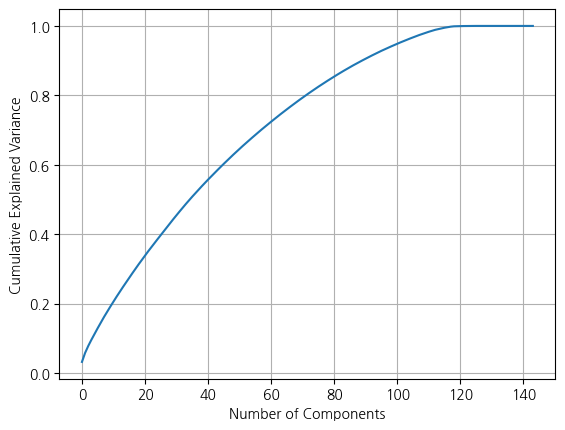

In [68]:
from sklearn.decomposition import PCA

# 누적 설명 분산 확인
pca = PCA().fit(X_KNN_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [69]:
from sklearn.decomposition import PCA
import numpy as np

# PCA 적합
pca = PCA().fit(X_KNN_train)

# 누적 설명 분산 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 95% 이상 설명하는 최소 차원 수 찾기
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"최적 n_components (95% 분산 설명): {optimal_n_components}")

최적 n_components (95% 분산 설명): 102


In [70]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ▶ PCA 차원 축소
pca = PCA(n_components=102)
X_train_pca = pca.fit_transform(X_KNN_train)
X_test_pca = pca.transform(X_KNN_test)

# ▶ 최적 K = 3 기준 KNN 모델 훈련
model_pca_knn = KNeighborsRegressor(n_neighbors=3)
model_pca_knn.fit(X_train_pca, y_KNN_train)

# ▶ 예측 수행
y_pred_pca = model_pca_knn.predict(X_test_pca)

# ▶ 평가 지표 계산
mae = mean_absolute_error(y_KNN_test, y_pred_pca)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_pred_pca))
r2 = r2_score(y_KNN_test, y_pred_pca)

# ▶ 결과 출력
print(f"PCA 적용 후 KNN 모델 평가")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

PCA 적용 후 KNN 모델 평가
R²   : 0.2928
MAE  : 56.2359
RMSE : 67.6596


PCA 적용, 최적의 K값 적용, 거리 가중치 부여 전부 적용한 모델

In [72]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# PCA 적용
pca = PCA(n_components = 102)  # 이전에 찾은 optimal_n_components 사용
X_train_pca = pca.fit_transform(X_KNN_train)
X_test_pca = pca.transform(X_KNN_test)

# 모델 학습 (K=3, 거리 가중치 부여)
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train_pca, y_KNN_train)
y_pred_weights = model.predict(X_test_pca)

# 성능 평가
mae = mean_absolute_error(y_KNN_test, y_pred_weights)
rmse = np.sqrt(mean_squared_error(y_KNN_test, y_pred_weights))
r2 = r2_score(y_KNN_test, y_pred_weights)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 54.5398
RMSE: 66.6321
R²: 0.3141


## **모델 결과 해석**

### OLS 모델

- Stepwise selection 변수 제거 전

MAE  (평균 절대 오차): 473.5098

MSE  (평균 제곱 오차): 2545976.0909

RMSE (루트 평균 제곱 오차): 1595.6115

R²  (결정 계수): -392.3255

Adjusted R²      : 3625.2137

- Stepwise selection 변수 제거 후

MAE  (평균 절대 오차): 26.8393

RMSE (루트 평균 제곱 오차): 35.1209

R²  (결정 계수): 0.771

Adjusted R²     : 0.760

- Stepwise 전후	변화 해석

MAE: 오차 대폭 감소 (–94%)

RMSE: 오차 안정성 개선

R²; 설명력 마이너스에서 매우 우수한 수준으로

Adjusted R²: 숫자 자체가 잘못되었거나 계산 오류 (전은 비정상 수치)

- Stepwise 전 상태

R² 음수: 모델이 평균보다 더 못한 예측을 함

MAE, RMSE 매우 큼: 모델이 데이터를 거의 전혀 설명하지 못함

원인:

과적합, 다중공선성, 불필요하거나 노이즈성 변수 다수 포함

또는 target과 전혀 관련 없는 독립변수들 포함

- Stepwise 후 상태

MAE = 26.84, RMSE = 35.12: 예측 오차가 상당히 안정됨

R² = 0.771: 설명력 매우 우수

Adjusted R² = 0.760: 변수 수 고려해도 우수함 → 모델이 간결해졌음을 시사

MAE 30 이하, RMSE 40 이하 목표 달성

### KNN 모델

- 처음

MAE  (평균 절대 오차): 58.2369

MSE  (평균 제곱 오차): 4797.3378

RMSE (루트 평균 제곱 오차): 69.2628

R²  (결정 계수): 0.2589

Adjusted R²      : nan

- 최적의 K값 적용 후

MAE (평균 절대 오차): 56.8462

RMSE (루트 평균 제곱 오차): 69.1504

R² (결정 계수): 0.2613

- 가까운 이웃에 가중치 부여 후

MAE (평균 절대 오차): 55.3478

RMSE (루트 평균 제곱 오차): 68.6270

R² (결정 계수)  : 0.2724

- PCA (차원축소) 적용 후

MAE (평균 절대 오차): 56.2359

RMSE (루트 평균 제곱 오차): 67.6596

R² (결정 계수)  : 0.2928

- PCA 적용, 최적의 K값 적용, 거리 가중치 부여 후

MAE (평균 절대 오차): 54.5398

RMSE (루트 평균 제곱 오차): 66.6321

R² (결정 계수): 0.3141

요약

R² 개선: 0.26 → 0.29까지 소폭 상승 (10% 이상 향상)

MAE 감소: 약 3포인트 감소 → 예측값이 조금 더 실제에 가까워짐

RMSE 감소: 오차 분산이 줄었음을 의미 → 예측 안정성 향상

PCA 적용이 성능 향상에 가장 효과적이었음
→ 고차원의 거리가 왜곡되던 문제를 차원축소로 해결

다만, 극적인 성능 향상이 이루어지지 않음.

거리 기반 측정의 한계

MAE, RMSE 목표 달성 실패

### LASSO 모델

MAE (평균 절대 오차) : 27.3568

MSE (평균 제곱 오차) : 1198.7249

RMSE (루트 평균 제곱 오차): 34.6226

R² (결정 계수) : 0.7769

항목	평가

 설명력 (R²):	OLS Stepwise 모델(R²=0.771) 보다 약간 높음 → 변수 자동 선택 기능이 잘 작동

 MAE / RMSE	오차도: Stepwise OLS 수준으로 낮음 (비슷하거나 더 안정적임)

 과적합 방지:	LASSO는 L1 정규화를 통해 불필요한 변수 계수를 자동으로 0으로 만들어줌 → 해석 가능한 모델

 변수 선택 효과:	LASSO가 유의하지 않거나 상관관계 높은 변수들을 제거했을 가능성 큼

LASSO가 가장 안정적이고 해석 가능하며 오차가 작음

### 다중선형회귀모델

- Stepwise selection 적용 후

MAE  (평균 절대 오차): 58.2369

MSE  (평균 제곱 오차): 4797.3378

RMSE (루트 평균 제곱 오차): 69.2628

MAE/ RMSE가 매우 큼	예측력이 낮고 불안정함

모델 해석력도 떨어짐	많은 변수들이 무의미하거나 다중공선성이 존재할 가능성

선형 관계 가정 위배 가능성	변수와 FARE 사이의 관계가 반드시 선형이라고 볼 수 없음
